In [1]:
import ThreeD_Net_Tools_0203 as D3

import sys
import math
import numpy as np #v 1.23.3
import networkx as nx
import matplotlib.cm as cm
import matplotlib
import argparse
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from networkx.algorithms import community
import community
from community import community_louvain #conda install python-louvain
from PIL import Image
import os
import scipy
from numpy import roots
import random
import ast
import pickle

#%matplotlib notebook

In [2]:
USR='LUKE'

In [76]:
#os.getcwd()
list_paths_skl=[]
list_paths_vol=[]
if USR=='LUKE':
    ALL_ANALYSIS='ALL_GAUDI.csv'#finalfilename
    #directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/03-05-23_4"
    directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2"
    clean_Gs=directory+'/GRAPHS/CLEANED'
    dir_G=clean_Gs+"/BASE"
    dir_G_widths=clean_Gs+'/WIDTHS'
    dir_G_widths_o=clean_Gs+'/WIDTH_O'
    pickle_f=directory+"/_keyed_nodes.pickle"
    
    os.chdir(directory)
    #os.chdir("/media/ll16598/One Touch/CT_ANALYSIS/")
    #VOXEL_SIZES = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VOXEL_SIZES.csv')

elif USR=='SUPER':
    directory="/media/cf19810/One Touch/CT_ANALYSIS"
    dir_G="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/BASE"
    dir_G_inverted='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/INVERTED'
    dir_G_widths='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/WIDTHS'
    dir_G_widths_inverted='/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/WIDTHS_INVERTED'
    dir_G_short="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SHORT"
    dir_G_spatial="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SPATIAL"
    dir_G_short_widths="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SHORT_WIDTH"
    dir_G_spatial_widths="/media/cf19810/One Touch/CT_ANALYSIS/GRAPHS/SPATIAL_WIDTH"
    
    os.chdir("/media/cf19810/One Touch/CT_ANALYSIS")
    VOXEL_SIZES = pd.read_csv('/home/cf19810/Documents/LUKE/VOXEL_SIZES.csv')

In [54]:
TREATS = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/COLONY_INFO.csv')
analysis_df=TREATS

In [55]:
name_list=[]
for i in TREATS['name']:
    name_list.append(i)

In [56]:
# dir_G='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/GRAPHS/WIDTHS'
# dir_G_short='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/GRAPHS/SHORT_WIDTH'
# dir_G_spatial='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/GRAPHS/SPATIAL_WIDTH'

ENSURE YOU ARE RUNNING THE CORRECT GRAPHS. WIDTHS OR INVERTED.

In [57]:
WIDTH=True
WIDTH_O=False
SHORT=False
if SHORT==True:
    shorted='shortened_'
else:
    shorted=''

In [58]:
#print('USING REDUCED JUNC RM Gs')
if SHORT==True:
    if WIDTH==True:
        print('WIDTH TAKEN INTO ACCOUNT')
        files_short = [ f.path for f in os.scandir(dir_G_short_widths)]
        files_spatial = [ f.path for f in os.scandir(dir_G_spatial_widths)]

    elif WIDTH==False:
        print('WIDTH NOT TAKEN INTO ACCOUNT')
        files_short = [ f.path for f in os.scandir(dir_G_short)]
        files_spatial = [ f.path for f in os.scandir(dir_G_spatial)]


In [59]:
WIDTH=True

In [60]:
if WIDTH_O==True:
    files_width = [ f.path for f in os.scandir(dir_G_widths_o)]
    files_inverted = [ f.path for f in os.scandir(dir_G_widths_inverted)]
    files_length = [ f.path for f in os.scandir(dir_G)]

    print('WIDTH ONLY TAKEN INTO ACCOUNT')

elif WIDTH==True:
    files = [ f.path for f in os.scandir(dir_G_widths)]
    print('WIDTH TAKEN INTO ACCOUNT')
elif WIDTH==False:
    print('WIDTH NOT TAKEN INTO ACCOUNT')
    files = [ f.path for f in os.scandir(dir_G)]
    files_inverted = [ f.path for f in os.scandir(dir_G_inverted)]
#files_short = [ f.path for f in os.scandir(dir_G_short)]
#files_spatial = [ f.path for f in os.scandir(dir_G_spatial)]

WIDTH TAKEN INTO ACCOUNT


In [20]:
G_list=[]
all_names=[]
l=0
while l<len(files) and len(G_list)<100:
    for file in range(0,len(files)):
        day=os.path.basename(files[file])
        filename = "_".join(day.split("_")[:2])  # Split by underscore, take first two parts, join with underscore
        #print(file)

        if filename == name_list[l]:
            G=nx.read_graphml(files[file])
            Gs = sorted(nx.connected_components(G), key=len, reverse=True)
            Gmax = G.subgraph(Gs[0])
            attributes = nx.get_node_attributes(Gmax, 'TYPE')
#     try:

            G_list.append(Gmax)
            print(filename)
            all_names.append(filename)
            l+=1
        else:
            l+=0

R1C1SK_TUE
R1C1SK_WED
R1C1SK_THU
R1C1SK_FRI
R1C1SK_MON
R1C2PM_TUE
R1C2PM_WED
R1C2PM_THU
R1C2PM_FRI
R1C2PM_MON
R2C1PK_TUE
R2C1PK_WED
R2C1PK_THU
R2C1PK_FRI
R2C1PK_MON
R2C2SM_TUE
R2C2SM_WED
R2C2SM_THU
R2C2SM_FRI
R2C2SM_MON
R3C1SK_TUE
R3C1SK_WED
R3C1SK_THU
R3C1SK_FRI
R3C1SK_MON
R3C2PM_TUE
R3C2PM_WED
R3C2PM_THU
R3C2PM_FRI
R3C2PM_MON
R4C1PK_TUE
R4C1PK_WED
R4C1PK_THU
R4C1PK_FRI
R4C1PK_MON
R4C2SM_TUE
R4C2SM_WED
R4C2SM_THU
R4C2SM_FRI
R4C2SM_MON
R5C1SK_TUE
R5C1SK_WED
R5C1SK_THU
R5C1SK_FRI
R5C1SK_MON
R5C2PM_TUE
R5C2PM_WED
R5C2PM_THU
R5C2PM_FRI
R5C2PM_MON
R6C1PK_TUE
R6C1PK_WED
R6C1PK_THU
R6C1PK_FRI
R6C1PK_MON
R6C2SM_TUE
R6C2SM_WED
R6C2SM_THU
R6C2SM_FRI
R6C2SM_MON
R7C1SK_TUE
R7C1SK_WED
R7C1SK_THU
R7C1SK_FRI
R7C1SK_MON
R7C2PM_TUE
R7C2PM_WED
R7C2PM_THU
R7C2PM_FRI
R7C2PM_MON
R8C1PL_TUE
R8C1PL_WED
R8C1PL_THU
R8C1PL_FRI
R8C1PL_MON
R8C2SL_TUE
R8C2SL_WED
R8C2SL_THU
R8C2SL_FRI
R8C2SL_MON
R9C1SL_TUE
R9C1SL_WED
R9C1SL_THU
R9C1SL_FRI
R9C1SL_MON
R9C2PL_TUE
R9C2PL_WED
R9C2PL_THU
R9C2PL_FRI
R9C2PL_MON
R10C1PL_TU

IndexError: list index out of range

Reading in the graphs. Graphs with _short_ are junction removed with shortest path length based on edge number between nodes. _spatial_ are based on spatial distance between nodes, using Dijkstra.

If useing the reduced networks this will now average their edge weights.

It was still necessary to manually annotate and de_annotate some nest-entrances. This block assigns them:

In [69]:


files = [ f.path for f in os.scandir(dir_G_widths)]
G_list_width=[]
all_names=[]
l=0
while l<len(files) and len(G_list_width)<100:
    for file in range(0,len(files)):
        day=os.path.basename(files[file])
        filename = "_".join(day.split("_")[:2])  # Split by underscore, take first two parts, join with underscore
        #print(file)

        if filename == name_list[l]:
            G=nx.read_graphml(files[file])
            Gs = sorted(nx.connected_components(G), key=len, reverse=True)
            Gmax = G.subgraph(Gs[0])
            attributes = nx.get_node_attributes(Gmax, 'TYPE')
            for u, v, data in Gmax.edges(data=True):
                length = data['weight']
                width = Gmax.get_edge_data(u, v)['weight']
#                 print(width)
                                     
            G_list_width.append(Gmax)
            print(filename)
            all_names.append(filename)
            l+=1
        else:
            l+=0

R1C1SK_TUE
R1C1SK_WED
R1C1SK_THU
R1C1SK_FRI
R1C1SK_MON
R1C2PM_TUE
R1C2PM_WED
R1C2PM_THU
R1C2PM_FRI
R1C2PM_MON
R2C1PK_TUE
R2C1PK_WED
R2C1PK_THU
R2C1PK_FRI
R2C1PK_MON
R2C2SM_TUE
R2C2SM_WED
R2C2SM_THU
R2C2SM_FRI
R2C2SM_MON
R3C1SK_TUE
R3C1SK_WED
R3C1SK_THU
R3C1SK_FRI
R3C1SK_MON
R3C2PM_TUE
R3C2PM_WED
R3C2PM_THU
R3C2PM_FRI
R3C2PM_MON
R4C1PK_TUE
R4C1PK_WED
R4C1PK_THU
R4C1PK_FRI
R4C1PK_MON
R4C2SM_TUE
R4C2SM_WED
R4C2SM_THU
R4C2SM_FRI
R4C2SM_MON
R5C1SK_TUE
R5C1SK_WED
R5C1SK_THU
R5C1SK_FRI
R5C1SK_MON
R5C2PM_TUE
R5C2PM_WED
R5C2PM_THU
R5C2PM_FRI
R5C2PM_MON
R6C1PK_TUE
R6C1PK_WED
R6C1PK_THU
R6C1PK_FRI
R6C1PK_MON
R6C2SM_TUE
R6C2SM_WED
R6C2SM_THU
R6C2SM_FRI
R6C2SM_MON
R7C1SK_TUE
R7C1SK_WED
R7C1SK_THU
R7C1SK_FRI
R7C1SK_MON
R7C2PM_TUE
R7C2PM_WED
R7C2PM_THU
R7C2PM_FRI
R7C2PM_MON
R8C1PL_TUE
R8C1PL_WED
R8C1PL_THU
R8C1PL_FRI
R8C1PL_MON
R8C2SL_TUE
R8C2SL_WED
R8C2SL_THU
R8C2SL_FRI
R8C2SL_MON
R9C1SL_TUE
R9C1SL_WED
R9C1SL_THU
R9C1SL_FRI
R9C1SL_MON
R9C2PL_TUE
R9C2PL_WED
R9C2PL_THU
R9C2PL_FRI
R9C2PL_MON
R10C1PL_TU

IndexError: list index out of range

In [78]:
dir_g_length=dir_G


files = [ f.path for f in os.scandir(dir_g_length)]
G_list_length=[]
all_names=[]
l=0
while l<len(files) and len(G_list_length)<100:
    for file in range(0,len(files)):
        day=os.path.basename(files[file])
        filename = "_".join(day.split("_")[:2])  # Split by underscore, take first two parts, join with underscore
        #print(file)

        if filename == name_list[l]:
            G=nx.read_graphml(files[file])
            Gs = sorted(nx.connected_components(G), key=len, reverse=True)
            Gmax = G.subgraph(Gs[0])
            attributes = nx.get_node_attributes(Gmax, 'TYPE')

                                     
            G_list_length.append(Gmax)
            print(filename)
            all_names.append(filename)
            l+=1
        else:
            l+=0

R1C1SK_TUE
R1C1SK_WED
R1C1SK_THU
R1C1SK_FRI
R1C1SK_MON
R1C2PM_TUE
R1C2PM_WED
R1C2PM_THU
R1C2PM_FRI
R1C2PM_MON
R2C1PK_TUE
R2C1PK_WED
R2C1PK_THU
R2C1PK_FRI
R2C1PK_MON
R2C2SM_TUE
R2C2SM_WED
R2C2SM_THU
R2C2SM_FRI
R2C2SM_MON
R3C1SK_TUE
R3C1SK_WED
R3C1SK_THU
R3C1SK_FRI
R3C1SK_MON
R3C2PM_TUE
R3C2PM_WED
R3C2PM_THU
R3C2PM_FRI
R3C2PM_MON
R4C1PK_TUE
R4C1PK_WED
R4C1PK_THU
R4C1PK_FRI
R4C1PK_MON
R4C2SM_TUE
R4C2SM_WED
R4C2SM_THU
R4C2SM_FRI
R4C2SM_MON
R5C1SK_TUE
R5C1SK_WED
R5C1SK_THU
R5C1SK_FRI
R5C1SK_MON
R5C2PM_TUE
R5C2PM_WED
R5C2PM_THU
R5C2PM_FRI
R5C2PM_MON
R6C1PK_TUE
R6C1PK_WED
R6C1PK_THU
R6C1PK_FRI
R6C1PK_MON
R6C2SM_TUE
R6C2SM_WED
R6C2SM_THU
R6C2SM_FRI
R6C2SM_MON
R7C1SK_TUE
R7C1SK_WED
R7C1SK_THU
R7C1SK_FRI
R7C1SK_MON
R7C2PM_TUE
R7C2PM_WED
R7C2PM_THU
R7C2PM_FRI
R7C2PM_MON
R8C1PL_TUE
R8C1PL_WED
R8C1PL_THU
R8C1PL_FRI
R8C1PL_MON
R8C2SL_TUE
R8C2SL_WED
R8C2SL_THU
R8C2SL_FRI
R8C2SL_MON
R9C1SL_TUE
R9C1SL_WED
R9C1SL_THU
R9C1SL_FRI
R9C1SL_MON
R9C2PL_TUE
R9C2PL_WED
R9C2PL_THU
R9C2PL_FRI
R9C2PL_MON
R10C1PL_TU

IndexError: list index out of range

This is the flow graph anlysis where entrances, chambers and endpoints can be treated as sources/sinks.

In [79]:
def invert_edge_weights (G_list):
    G_list_inverted=[]
    for g in range(len(G_list)):
        G1=G_list[g]
        G=G1.copy(G1)
        for u, v, data in G.edges(data=True):
            data['weight'] = 1/data['weight']
        G_list_inverted.append(G)
    return G_list_inverted
G_list_inverted=invert_edge_weights(G_list)

This is path length analysis. it runs between chambers and nest entrances (ch-ne), chambers and chambers (ch_ch) and nest-entrances to nest entrances (ne_ne). Looks confusing but short_path is the number of edges in the shortest path. This is repeated using Dijkstra's algorithm, which factors in weights, not edge number (short_paths_list_spatial). For network and dijkstra methods there is also the associated total path length - tot_paths for network; sptl_paths for Dijkstra.

This is modified from og version so path ids is just chamber


In [80]:
def paths (G, list1, list2, traversal_list):
    chamber_nodes=list1
    nest_nodes=list2
    all_short_paths=[]
    all_short_paths_spatial=[]
    all_tot_paths=[]
    all_spatial_paths=[]
    shortest_short_paths=[]
    shortest_short_paths_spatial=[]
    shortest_tot_paths=[]
    shortest_spatial_paths=[]
    all_network_cham_traversed=[]
    all_spatial_cham_traversed=[]
    all_path_ids=[]
    if len(chamber_nodes)>0:
        for chamber in chamber_nodes:
            shortest_paths=[]
            total_paths=[]
            spatial_paths=[]
            shortest_paths_spatial=[]
            p_shortest_paths=[]
            p_total_paths=[]
            p_spatial_paths=[]
            p_shortest_paths_spatial=[]
        
            net_cham_traversed_list=[]
            sptl_cham_traversed_list=[]
            path_ids=[]
            for nest in nest_nodes:
                try:
                    path = nx.shortest_path(G, source=chamber, target=nest)
                    path_ids.append(chamber)
                    network_cham_traversed=[]
                    for node in path:
                        if node in traversal_list and node!=chamber:
                            network_cham_traversed.append(node)
                    network_cham_traversed=len(network_cham_traversed)
                    net_cham_traversed_list.append(network_cham_traversed)
                    
                    #path_spatial is the shortest euclidean path
                    path_spatial = nx.dijkstra_path(G, source=nest, target=chamber, weight='weight')
                    
                    sptl_cham_traversed=[]
                    for node in path_spatial:
                        if node in traversal_list and node!=chamber:
                            sptl_cham_traversed.append(node)
                    sptl_cham_traversed=len(sptl_cham_traversed)
                    sptl_cham_traversed_list.append(sptl_cham_traversed)
                    
                    edges_spatial = [(path_spatial[i], path_spatial[i+1]) for i in range(len(path_spatial)-1)]
                    edge_weights_spatial = [G.get_edge_data(path_spatial[i], path_spatial[i+1])['weight'] for i in range(len(path_spatial) - 1)]
                    edge_num_spatial=len(edges_spatial)
                    path_dist_spatial=np.sum(edge_weights_spatial)
                    shortest_paths_spatial.append(edge_num_spatial)
                    spatial_paths.append(path_dist_spatial)#print("Shortest path between {} and {}: {}".format(chamber, nest, path))
                    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
                    edge_weights = [G.get_edge_data(path[i], path[i+1])['weight'] for i in range(len(path) - 1)]
                    edge_num=len(edges)
                    path_dist=np.sum(edge_weights)
                    shortest_paths.append(edge_num)
                    total_paths.append(path_dist)
                    
                except nx.NetworkXNoPath:
                    print("No path found between {} and {}".format(chamber, nest))
            l=100
            for path in shortest_paths:
                if path<l:
                    l=path
            if l==100:
                l=np.nan
            p_shortest_paths.append(l)
            l=100
            for path in total_paths:
                if path<l:
                    l=path
            if l==100:
                l=np.nan
            p_total_paths.append(l)
            l=100
            for path in spatial_paths:
                if path<l:
                    l=path
            if l==100:
                l=np.nan
            p_spatial_paths.append(l)
            l=100
            for path in shortest_paths_spatial:
                if path<l:
                    l=path
            if l==100:
                l=np.nan
            p_shortest_paths_spatial.append(l)
            
            all_short_paths.extend(shortest_paths)
            all_tot_paths.extend(total_paths)
            all_spatial_paths.extend(spatial_paths)
            all_short_paths_spatial.extend(shortest_paths_spatial)
            shortest_short_paths.extend(p_shortest_paths)
            shortest_short_paths_spatial.extend(p_shortest_paths_spatial)
            shortest_tot_paths.extend(p_total_paths)
            shortest_spatial_paths.extend(p_shortest_paths_spatial)
        
            all_network_cham_traversed.extend(net_cham_traversed_list)
            all_spatial_cham_traversed.extend(sptl_cham_traversed_list)
            all_path_ids.extend(path_ids)

    else:
        all_short_paths=np.nan
        all_tot_paths=np.nan
        all_spatial_paths=np.nan
        all_short_paths_spatial=np.nan
        shortest_short_paths=np.nan
        shortest_short_paths_spatial=np.nan
        shortest_tot_paths=np.nan
        shortest_spatial_paths=np.nan
        
        all_network_cham_traversed=np.nan
        all_sptl_cham_traversed=np.nan
        all_path_ids=np.nan
    return all_short_paths, all_tot_paths, all_spatial_paths, all_short_paths_spatial, shortest_short_paths, shortest_short_paths_spatial, shortest_tot_paths, shortest_spatial_paths, all_network_cham_traversed, all_spatial_cham_traversed, all_path_ids

In [81]:
#junction-junction paths
if SHORT==False:
    all_short_paths_list=[]
    all_tot_paths_list=[]
    all_sptl_paths_list=[]
    all_short_paths_list_spatial=[]

    #ch-ch paths
    chch_all_short_paths_list=[]
    chch_all_tot_paths_list=[]
    chch_all_sptl_paths_list=[]
    chch_all_short_paths_list_spatial=[]

    #j-ch paths
    jch_all_short_paths_list=[]
    jch_all_tot_paths_list=[]
    jch_all_sptl_paths_list=[]
    jch_all_short_paths_list_spatial=[]

    #ne-ch paths
    nech_all_short_paths_list=[]
    nech_all_tot_paths_list=[]
    nech_all_sptl_paths_list=[]
    nech_all_short_paths_list_spatial=[]
    
    nech_shortest_short_paths_list=[] 
    nech_shortest_short_paths_spatial_list=[]
    nech_shortest_tot_paths_list=[]
    nech_shortest_spatial_paths_list=[]

    NECH_COMBINED_PATH_LIST=[]
    CH_COMBINED_PATH_LIST=[]
    
    chch_all_network_cham_traversed_list=[] 
    chch_all_spatial_cham_traversed_list=[]
    
    nech_all_network_cham_traversed_list=[] 
    nech_all_spatial_cham_traversed_list=[]
    
    all_network_cham_traversed_list=[] 
    all_spatial_cham_traversed_list=[]
    
    ch_path_id_list=[]
    nech_path_id_list=[]
    all_path_id_list=[]
    for g in range(len(G_list)):    
        if WIDTH_O==True:
            G=G_list_inverted[g]
        else:
            G=G_list[g]
        
        attributes = nx.get_node_attributes(G, 'TYPE')
        #     try:
        nest_nodes = [node for node, type_value in attributes.items() if type_value == 'NEST EN']
        chamber_nodes = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        junction_nodes = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        end_nodes = [node for node, type_value in attributes.items() if type_value == 'END']
        if g==0:
            print(junction_nodes)
            
        list_nodes=nest_nodes+chamber_nodes+junction_nodes+end_nodes
        nech_all_short_paths, nech_all_tot_paths, nech_all_sptl_paths, \
        nech_all_short_paths_spatial, nech_shortest_short_paths, \
        nech_shortest_short_paths_spatial, nech_shortest_tot_paths, nech_shortest_spatial_paths,\
        nech_all_network_cham_traversed, nech_all_spatial_cham_traversed, nech_path_ids=paths(G, junction_nodes,nest_nodes,  junction_nodes)



        #ne-ch paths
        nech_all_short_paths_list.append(nech_all_short_paths)
        nech_all_tot_paths_list.append(nech_all_tot_paths)
        nech_all_sptl_paths_list.append(nech_all_sptl_paths)
        nech_all_short_paths_list_spatial.append(nech_all_short_paths_spatial)
        
        nech_shortest_short_paths_list.append(nech_shortest_short_paths)
        nech_shortest_short_paths_spatial_list.append(nech_shortest_short_paths_spatial)
        nech_shortest_tot_paths_list.append(nech_shortest_tot_paths)
        nech_shortest_spatial_paths_list.append(nech_shortest_spatial_paths)
        

        nech_ids=[]
        try:
            for ncpath in nech_path_ids:
                nech_ids.append(ncpath)
        except TypeError:
            nech_ids=np.nan

        nech_path_id_list.append(nech_ids)


    analysis_df['nech_all_short_paths_list']=nech_all_short_paths_list
    analysis_df['nech_all_tot_paths_list']=nech_all_tot_paths_list
    analysis_df['nech_all_sptl_paths_list']=nech_all_sptl_paths_list
    analysis_df['nech_all_short_paths_list_spatial']=nech_all_short_paths_list_spatial

    analysis_df['nech_shortest_short_paths_list']=nech_shortest_short_paths_list
    analysis_df['nech_shortest_short_paths_spatial_list']=nech_shortest_short_paths_spatial_list
    analysis_df['nech_shortest_tot_paths_list']=nech_shortest_tot_paths_list
    analysis_df['nech_shortest_spatial_paths_list']=nech_shortest_spatial_paths_list
    analysis_df['nech_path_ids']=nech_path_id_list

['7', '15', '10', '6', '1']


In [82]:
#junction-junction paths
if SHORT==False:
    all_short_paths_list=[]
    all_tot_paths_list=[]
    all_sptl_paths_list=[]
    all_short_paths_list_spatial=[]

    #ch-ch paths
    chch_all_short_paths_list=[]
    chch_all_tot_paths_list=[]
    chch_all_sptl_paths_list=[]
    chch_all_short_paths_list_spatial=[]

    #j-ch paths
    jch_all_short_paths_list=[]
    jch_all_tot_paths_list=[]
    jch_all_sptl_paths_list=[]
    jch_all_short_paths_list_spatial=[]

    #ne-ch paths
    nech_all_short_paths_list=[]
    nech_all_tot_paths_list=[]
    nech_all_sptl_paths_list=[]
    nech_all_short_paths_list_spatial=[]
    
    nech_shortest_short_paths_list=[] 
    nech_shortest_short_paths_spatial_list=[]
    nech_shortest_tot_paths_list=[]
    nech_shortest_spatial_paths_list=[]

    NECH_COMBINED_PATH_LIST=[]
    CH_COMBINED_PATH_LIST=[]
    
    chch_all_network_cham_traversed_list=[] 
    chch_all_spatial_cham_traversed_list=[]
    
    nech_all_network_cham_traversed_list=[] 
    nech_all_spatial_cham_traversed_list=[]
    
    all_network_cham_traversed_list=[] 
    all_spatial_cham_traversed_list=[]
    
    ch_path_id_list=[]
    nech_path_id_list=[]
    all_path_id_list=[]
    for g in range(len(G_list)):    
        if WIDTH_O==True:
            G=G_list_inverted[g]
        else:
            G=G_list_length[g]
        
        attributes = nx.get_node_attributes(G, 'TYPE')
        #     try:
        nest_nodes = [node for node, type_value in attributes.items() if type_value == 'NEST EN']
        chamber_nodes = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        junction_nodes = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        end_nodes = [node for node, type_value in attributes.items() if type_value == 'END']
        if g==0:
            print(junction_nodes)
            
        list_nodes=nest_nodes+chamber_nodes+junction_nodes+end_nodes
        nech_all_short_paths, nech_all_tot_paths, nech_all_sptl_paths, \
        nech_all_short_paths_spatial, nech_shortest_short_paths, \
        nech_shortest_short_paths_spatial, nech_shortest_tot_paths, nech_shortest_spatial_paths,\
        nech_all_network_cham_traversed, nech_all_spatial_cham_traversed, nech_path_ids=paths(G, junction_nodes,nest_nodes,  junction_nodes)



        #ne-ch paths
        nech_all_short_paths_list.append(nech_all_short_paths)
        nech_all_tot_paths_list.append(nech_all_tot_paths)
        nech_all_sptl_paths_list.append(nech_all_sptl_paths)
        nech_all_short_paths_list_spatial.append(nech_all_short_paths_spatial)
        
        nech_shortest_short_paths_list.append(nech_shortest_short_paths)
        nech_shortest_short_paths_spatial_list.append(nech_shortest_short_paths_spatial)
        nech_shortest_tot_paths_list.append(nech_shortest_tot_paths)
        nech_shortest_spatial_paths_list.append(nech_shortest_spatial_paths)
        

        nech_ids=[]
        try:
            for ncpath in nech_path_ids:
                nech_ids.append(ncpath)
        except TypeError:
            nech_ids=np.nan

        nech_path_id_list.append(nech_ids)


    analysis_df['nech_all_short_paths_list_len']=nech_all_short_paths_list
    analysis_df['nech_all_tot_paths_list_len']=nech_all_tot_paths_list
    analysis_df['nech_all_sptl_paths_list_len']=nech_all_sptl_paths_list
    analysis_df['nech_all_short_paths_list_spatial_len']=nech_all_short_paths_list_spatial

    analysis_df['nech_shortest_short_paths_list_len']=nech_shortest_short_paths_list
    analysis_df['nech_shortest_short_paths_spatial_list_len']=nech_shortest_short_paths_spatial_list
    analysis_df['nech_shortest_tot_paths_list_len']=nech_shortest_tot_paths_list
    analysis_df['nech_shortest_spatial_paths_list_len']=nech_shortest_spatial_paths_list
    analysis_df['nech_path_ids_len']=nech_path_id_list

['7', '15', '10', '6', '1']


In [83]:

vals3 = []
path_list=[]
for i in range(len(analysis_df['nech_path_ids'])):
    pids = analysis_df['nech_path_ids'][i]
    pls = analysis_df['nech_all_sptl_paths_list'][i]
    
    # Create a dictionary to store the values for each unique ID
    values_dict = {}
    values_dict2 = {}
    for ii in range(len(pids)):
        pid = pids[ii]
        pl = pls[ii]
        
        # If the ID is not in the dictionary, add it with an empty list
        if pid not in values_dict:
            values_dict[pid] = []
            values_dict2[pid] = []

        
        # Append the value to the list for this ID
        values_dict[pid].append(pl)
    
    # Calculate the mean for each ID and append to vals3
    for pid, values in values_dict.items():
        mean_value = np.mean(values)
        values_dict2[pid].append(mean_value)
    vals3.append(values_dict2)
    path_list.extend(values_dict2.values())

In [84]:

vals3_len = []
path_list_len=[]
for i in range(len(analysis_df['nech_path_ids_len'])):
    pids = analysis_df['nech_path_ids_len'][i]
    pls = analysis_df['nech_all_sptl_paths_list_len'][i]
    
    # Create a dictionary to store the values for each unique ID
    values_dict = {}
    values_dict2 = {}
    for ii in range(len(pids)):
        pid = pids[ii]
        pl = pls[ii]
        
        # If the ID is not in the dictionary, add it with an empty list
        if pid not in values_dict:
            values_dict[pid] = []
            values_dict2[pid] = []

        
        # Append the value to the list for this ID
        values_dict[pid].append(pl)
    
    # Calculate the mean for each ID and append to vals3
    for pid, values in values_dict.items():
        mean_value = np.mean(values)
        values_dict2[pid].append(mean_value)
    vals3_len.append(values_dict2)
    path_list_len.extend(values_dict2.values())

This calculates the shortest paths between all pairs of nodes in a g.. It does everything twice, using edge number and dijkstra distances. It returns the diamete in edges first, then the associated path, then for dijkstra it gives edge number between each pair then summed edge wights, then for network measure it does the  same.  This has been validated with the networkx out-of-the box measure.

Main graph analysis:

In [85]:
STANDARDISE=True
if STANDARDISE==True:
    STD='_STD_'
else:
    STD=''
first_sections = [name.split('_')[0] for name in name_list]

In [86]:
incoorporate_length_only=False
#incoorporate nechpathbasedon length,withno width

In [87]:
chamber_ids=[]
deg_cen_list=[]
betweenness_list=[]
closeness_list=[]
closeness_list2=[]
G_LO_PATH_list=[]
G_HI_CLOSE_LO_PATH_list=[]
G_LO_CLOSE_HI_DEG_list=[]
G_HI_CLOSE_HI_DEG_list=[]
G_HI_CLOSE_LO_DEG_list=[]
for g in range(0,len(G_list)):
    G=G_list[g]
    s=name_list[g]
    parts = s.split("_", 1)  # Split the string at the first underscore
    day = parts[1]
    treatment = "Pathogen" if "P" in s else "Sham"
    
    Gs = sorted(nx.connected_components(G), key=len, reverse=True)
    Gmax = G.subgraph(Gs[0])
    G=Gmax
    
    G_inv=G_list_inverted[g]
    Gs_inv = sorted(nx.connected_components(G_inv), key=len, reverse=True)
    Gmax_inv = G_inv.subgraph(Gs_inv[0])
    G_inv=Gmax_inv
    
    attributes = nx.get_node_attributes(G, 'TYPE')
    ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
    ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
    ALL_NE_NUMS = [node for node, type_value in attributes.items() if type_value == 'NE']
    END = [node for node, type_value in attributes.items() if type_value == 'END']


    CNT=list(set(ALL_CHAM_NUMS + ALL_NE_NUMS + END)) 
    CN=list(set(ALL_CHAM_NUMS + ALL_NE_NUMS))
    CH1=list(set(ALL_CHAM_NUMS))
    JEC=list(ALL_JUNC_NUMS+ALL_CHAM_NUMS+END)

    nom = first_sections[g]
    ch_ids=[]
    for ch in ALL_CHAM_NUMS:
        ch_ids.append(nom+'_'+ch)
    chamber_ids.append(ch_ids)
  
    
    deg_cen=nx.degree_centrality(G)
    deg_centrality_values = [value for key, value in deg_cen.items() if key in ALL_JUNC_NUMS]
    deg_cen_list.extend(deg_centrality_values)

    deg_cen_l=list(deg_cen.values())
    np_deg_cen=np.array(deg_cen_l)
    mean_deg_cen=np.mean(np_deg_cen)
    std_deg_cen=np.std(np_deg_cen)
    print("mean degree centrality=",mean_deg_cen)
    print("std dev degree centrality=",std_deg_cen)


    closeness_centrality_spatial = nx.closeness_centrality(G, distance='weight', wf_improved=True)
    mean_closeness_centrality_spatial = sum(closeness_centrality_spatial.values())/len(closeness_centrality_spatial)
    print("closeness_centrality_spatial",mean_closeness_centrality_spatial)
    
    
    #closeness_centrality_spatial_values = list(closeness_centrality_spatial.values())
    closeness_centrality_spatial_values = [value for key, value in closeness_centrality_spatial.items() if key in ALL_JUNC_NUMS]
    closeness_list.extend(closeness_centrality_spatial_values)

    flow_centrality = nx.current_flow_betweenness_centrality_subset(G_inv, \
                                                             sources=ALL_NE_NUMS,\
                                                             targets=JEC, weight='weight', normalized=False)

    total_bc = sum(flow_centrality.values())
    flow_centrality = {node: centrality/total_bc for node, centrality in flow_centrality.items()}
    flow_centrality_values = list(flow_centrality.values())
    print('mean betweenness=', np.mean(flow_centrality_values))
    betweenness_centrality=flow_centrality
    betweenness_centrality_spatial_values = [value for key, value in betweenness_centrality.items() if key in ALL_JUNC_NUMS]
    betweenness_list.extend(betweenness_centrality_spatial_values)
    num_chams=len(ALL_CHAM_NUMS)
    
    nodes = list(ALL_JUNC_NUMS)
    
 
    #HIGH CLOSENESS SHORT PATH
    if treatment=="Pathogen":
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node:\
                                     closeness_centrality_spatial[node], reverse=True)
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])
       # sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node])

    elif treatment=="Sham":
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: \
                                     closeness_centrality_spatial[node], reverse=False)
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node], reverse=True)
       # sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node], reverse=True)

    # You can now select the top nodes based on these sorted lists.
    # For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            top_closeness_nodes = sorted_by_closeness[:n]
            bottom_path_nodes = sorted_by_path[:n]
            #Find the intersection of these two sets to get nodes that meet both criteria
#             if incoorporate_length_only==True:
#                 path_nodes_len = sorted_by_path_len[:n]
#                 optimal_nodes = list(set(top_closeness_nodes) & set(bottom_path_nodes) &set(path_nodes_len))

#             else:
            optimal_nodes = list(set(top_closeness_nodes) & set(bottom_path_nodes))

            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
            if n>1000:
                break
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_HI_CLOSE_LO_PATH=G.copy()
        if treatment=='Pathogen':
            print(nx.closeness_centrality(G, distance='weight', wf_improved=True))
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_HI_CLOSE_LO_PATH, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_HI_CLOSE_LO_PATH, {node: {'TYPE': 'CHAM'}})
            
        G_HI_CLOSE_LO_PATH_list.append(G_HI_CLOSE_LO_PATH)
        if treatment=='Pathogen':
            print(nx.closeness_centrality(G_HI_CLOSE_LO_PATH, distance='weight', wf_improved=True))

        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
    else:
        G_HI_CLOSE_LO_PATH_list.append(G)
    
    #MODIFYING JUST PATH
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            top_closeness_nodes = sorted_by_closeness[:n]
            bottom_path_nodes = sorted_by_path[:n]
            #Find the intersection of these two sets to get nodes that meet both criteria
            optimal_nodes = list(set(bottom_path_nodes))

            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
            if n>1000:
                break
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_HI_CLOSE_LO_PATH=G.copy()
        if treatment=='Pathogen':
            print(nx.closeness_centrality(G, distance='weight', wf_improved=True))
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_HI_CLOSE_LO_PATH, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_HI_CLOSE_LO_PATH, {node: {'TYPE': 'CHAM'}})
            
        G_LO_PATH_list.append(G_HI_CLOSE_LO_PATH)
        if treatment=='Pathogen':
            print(nx.closeness_centrality(G_HI_CLOSE_LO_PATH, distance='weight', wf_improved=True))

        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
    else:
        G_LO_PATH_list.append(G)
        
    #low close, high_path, high betweenness/degree
    if treatment=="Pathogen":
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node])
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node], reverse=True)
        #sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node], reverse=True)

        sorted_by_bet = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node], reverse=True)
        sorted_by_deg = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node], reverse=True)
    elif treatment=="Sham":
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])
        #sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node])
        sorted_by_bet = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node])
        sorted_by_deg = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node])
    # You can now select the top nodes based on these sorted lists.
    # For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            closeness_nodes = sorted_by_closeness[:n]
            path_nodes = sorted_by_path[:n]
            bet_nodes = sorted_by_bet[:n]
            deg_nodes = sorted_by_deg[:n]

            if incoorporate_length_only==True:
                path_nodes_len = sorted_by_path_len[:n]
                optimal_nodes = list(set(closeness_nodes) & set(path_nodes) & set(path_nodes_len)\
                                & set(bet_nodes) & set(deg_nodes))
            else:
                optimal_nodes = list(set(closeness_nodes) & set(path_nodes)\
                                    & set(bet_nodes) & set(deg_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
            if n>1000:
                break
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_LO_CLOSE_HI_DEG=G.copy()
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_LO_CLOSE_HI_DEG, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_LO_CLOSE_HI_DEG, {node: {'TYPE': 'CHAM'}})
            
        print(ALL_CHAM_NUMS, list_centrality_mod)
        G_LO_CLOSE_HI_DEG_list.append(G_LO_CLOSE_HI_DEG)
        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
    else:
        G_LO_CLOSE_HI_DEG_list.append(G)
        
    if treatment=="Pathogen":
        sorted_by_bet = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node], reverse=True)
        sorted_by_deg = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node], reverse=True)
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])
    #   sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node])

    if treatment=="Sham":
        sorted_by_bet = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node])
        sorted_by_deg = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node])
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node])
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node], reverse=True)    
      #  sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node], reverse=True)
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            closeness_nodes = sorted_by_closeness[:n]
            path_nodes = sorted_by_path[:n]
            bet_nodes = sorted_by_bet[:n]
            deg_nodes = sorted_by_deg[:n]

            if incoorporate_length_only==True:
                path_nodes_len = sorted_by_path_len[:n]
                optimal_nodes = list(set(closeness_nodes) & set(path_nodes) & set(path_nodes_len)\
                                & set(bet_nodes) & set(deg_nodes))
            else:
                optimal_nodes = list(set(closeness_nodes) & set(path_nodes)\
                                    & set(bet_nodes) & set(deg_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
            if n>1000:
                break
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_HI_CLOSE_HI_DEG=G.copy()
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_HI_CLOSE_HI_DEG, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_HI_CLOSE_HI_DEG, {node: {'TYPE': 'CHAM'}})
            
        G_HI_CLOSE_HI_DEG_list.append(G_HI_CLOSE_HI_DEG)
        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
    else:
        G_HI_CLOSE_HI_DEG_list.append(G)
        
        
##JUST MODIFY DEG/BET:
        
    if treatment=="Pathogen":

        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])
        #sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node])
        sorted_by_bet = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node])
        sorted_by_deg = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node])
        
    elif treatment=="Sham":
        sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node])
        sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node], reverse=True)
        #sorted_by_path_len = sorted(ALL_JUNC_NUMS, key=lambda node: vals3_len[g][node], reverse=True)

        sorted_by_bet = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node], reverse=True)
        sorted_by_deg = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node], reverse=True)
        
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            closeness_nodes = sorted_by_closeness[:n]
            path_nodes = sorted_by_path[:n]
            bet_nodes = sorted_by_bet[:n]
            deg_nodes = sorted_by_deg[:n]
            #we find the intersection of the sets
            if incoorporate_length_only==True:
                path_nodes_len = sorted_by_path_len[:n]
                optimal_nodes = list(set(closeness_nodes) & set(path_nodes) & set(path_nodes_len)\
                                & set(bet_nodes) & set(deg_nodes))
            else:
                optimal_nodes = list(set(closeness_nodes) & set(path_nodes)\
                                    & set(bet_nodes) & set(deg_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
            if n>1000:
                break
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_HI_CLOSE_LO_DEG=G.copy()
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_HI_CLOSE_LO_DEG, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_HI_CLOSE_LO_DEG, {node: {'TYPE': 'CHAM'}})
            
        G_HI_CLOSE_LO_DEG_list.append(G_HI_CLOSE_LO_DEG)
        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
    else:
        G_HI_CLOSE_LO_DEG_list.append(G)

mean degree centrality= 0.13333333333333333
std dev degree centrality= 0.07766431633476231
closeness_centrality_spatial 0.049645874713871004
mean betweenness= 0.06666666666666668
1
Nodes with lowest closeness and shortest path: ['15']
Nodes with lowest closeness and shortest path: ['15', '10']
1
['2'] ['6']
Nodes with lowest closeness and shortest path: ['6', '10']
1
Nodes with lowest closeness and shortest path: ['15']
1
Nodes with lowest closeness and shortest path: ['15']
mean degree centrality= 0.05507246376811594
std dev degree centrality= 0.025268979382844482
closeness_centrality_spatial 0.02447277177370935


<class 'networkx.utils.decorators.argmap'> compilation 25:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


mean betweenness= 0.02173913043478262
6
Nodes with lowest closeness and shortest path: ['19', '49']
Nodes with lowest closeness and shortest path: ['57', '38', '59', '42', '19', '47', '49', '23', '54', '60']
6
['24', '31', '33', '28', '2', '22'] ['27', '36', '17', '39', '26', '56']
Nodes with lowest closeness and shortest path: ['56', '59', '58']
6
Nodes with lowest closeness and shortest path: ['23']
6
Nodes with lowest closeness and shortest path: ['59', '23']
mean degree centrality= 0.06794871794871796
std dev degree centrality= 0.02599119863168371
closeness_centrality_spatial 0.03334788781039005
mean betweenness= 0.025000000000000015
7
Nodes with lowest closeness and shortest path: ['57', '35']
Nodes with lowest closeness and shortest path: ['20', '57', '38', '32', '29', '25', '19', '35']
7
['28', '24', '47', '33', '31', '2', '22'] ['17', '27', '56', '59', '29', '26', '36']
Nodes with lowest closeness and shortest path: ['36']
7
Nodes with lowest closeness and shortest path: ['57',

{'102': 0.018830108511995194, '45': 0.02207406758070956, '99': 0.032676034144546985, '106': 0.03312956718927271, '53': 0.03089026115302589, '89': 0.027815847232275093, '6': 0.010015599831715878, '91': 0.009833682019154034, '55': 0.02594732243865626, '27': 0.025182680708928123, '71': 0.028399249077533113, '43': 0.03067676928075699, '51': 0.018663880507933685, '74': 0.020838648769272074, '101': 0.010270088123177638, '69': 0.03162650429045475, '61': 0.016546273954015818, '93': 0.02300545972077054, '24': 0.02503279284282721, '103': 0.03329626967362177, '48': 0.027383509853406356, '58': 0.031155759692214197, '88': 0.03248794695021907, '11': 0.02120081791405888, '83': 0.021670365799899245, '92': 0.02512871876346579, '31': 0.01962333548188198, '79': 0.02803225326667523, '78': 0.02830753073031126, '107': 0.021933391460784487, '104': 0.022865641774299436, '28': 0.029965784569645014, '84': 0.029603106990394385, '54': 0.0317949613816136, '90': 0.028273984726102295, '73': 0.020161761864614706, '57

{'99': 0.03741560604512144, '58': 0.0380815235835104, '92': 0.03502924034104771, '161': 0.035672963790480045, '10': 0.04354971054717153, '169': 0.0418642001769331, '41': 0.043493047190838054, '2': 0.04177437876768376, '63': 0.033663259813370316, '143': 0.02889545132024476, '167': 0.04556752346458446, '158': 0.04975767836221397, '24': 0.03903374555908607, '26': 0.038754720585159996, '68': 0.03506192536386586, '148': 0.04184247375594683, '86': 0.0384900955874834, '57': 0.03088912601431638, '152': 0.0335783701583136, '11': 0.03732461031556085, '174': 0.03595539901477403, '23': 0.036077912465038324, '136': 0.03708057575231866, '128': 0.03437719561653629, '80': 0.03225811648153924, '113': 0.03423393469767405, '146': 0.029388569700213824, '154': 0.03174629354795142, '121': 0.03201127710463253, '122': 0.04570685730180192, '155': 0.05079216737734791, '141': 0.0434396783761856, '114': 0.042705513386486364, '27': 0.037791969556199775, '112': 0.03355894181225244, '130': 0.03840418374045966, '165'

{'284': 0.02109714190313267, '207': 0.021223632028912965, '203': 0.026595520792097597, '201': 0.021540596935791235, '103': 0.03658534134367491, '225': 0.03733462974608166, '83': 0.030116272941795322, '165': 0.037696044130216294, '251': 0.019962091244593017, '205': 0.02070176244961671, '261': 0.012318680393756666, '272': 0.016329832650904073, '262': 0.025102687655677695, '214': 0.028852643277153832, '259': 0.034920295288190926, '256': 0.037539292642985764, '299': 0.02285497485285739, '290': 0.02715198431195526, '275': 0.026201183187021877, '222': 0.023234932718111955, '198': 0.01478437700197564, '219': 0.016486967125050326, '177': 0.024239684796380098, '184': 0.02506246611083306, '10': 0.025611742619078025, '260': 0.02944808483534682, '270': 0.03317786038178189, '276': 0.017394119937271992, '250': 0.020124594421961718, '80': 0.03106506274110795, '85': 0.03171132977271258, '283': 0.0212185021850982, '268': 0.024179961926540098, '258': 0.027046572133381862, '124': 0.034531564835951135, '1

closeness_centrality_spatial 0.026162607093616473
mean betweenness= 0.00653594771241829
64
{'187': 0.0339880958184268, '297': 0.03496427194721145, '211': 0.03526171976308391, '294': 0.02203006821576319, '322': 0.0239107502827218, '299': 0.01757361908152041, '329': 0.017203353021087532, '202': 0.018701782371459613, '221': 0.018359343080580053, '272': 0.019913133168098868, '173': 0.02982306173541494, '225': 0.027046501374238877, '268': 0.022128020518942824, '142': 0.023288615735811865, '255': 0.02610900769574561, '311': 0.0278019913481632, '248': 0.030266835050027547, '182': 0.03026553222724855, '245': 0.02889075889355639, '247': 0.027923516661003362, '366': 0.02183933510424628, '359': 0.02020475728139749, '80': 0.03225069067604532, '363': 0.029967786716930955, '323': 0.01774510565037481, '254': 0.02144444422462705, '24': 0.03149426284282767, '107': 0.02973842919916829, '185': 0.024791928768101254, '208': 0.02810558256766739, '155': 0.0288914272194407, '10': 0.028082264270651507, '274': 

{'187': 0.0339880958184268, '297': 0.03496427194721145, '211': 0.03526171976308391, '294': 0.02203006821576319, '322': 0.0239107502827218, '299': 0.01757361908152041, '329': 0.017203353021087532, '202': 0.018701782371459613, '221': 0.018359343080580053, '272': 0.019913133168098868, '173': 0.02982306173541494, '225': 0.027046501374238877, '268': 0.022128020518942824, '142': 0.023288615735811865, '255': 0.02610900769574561, '311': 0.0278019913481632, '248': 0.030266835050027547, '182': 0.03026553222724855, '245': 0.02889075889355639, '247': 0.027923516661003362, '366': 0.02183933510424628, '359': 0.02020475728139749, '80': 0.03225069067604532, '363': 0.029967786716930955, '323': 0.01774510565037481, '254': 0.02144444422462705, '24': 0.03149426284282767, '107': 0.02973842919916829, '185': 0.024791928768101254, '208': 0.02810558256766739, '155': 0.0288914272194407, '10': 0.028082264270651507, '274': 0.021751773366196474, '340': 0.01934737760177511, '213': 0.016931267994833625, '334': 0.036

mean betweenness= 0.02857142857142859
0
0
0
0
mean degree centrality= 0.051803885291396866
std dev degree centrality= 0.02081919969459186
closeness_centrality_spatial 0.02388550958563995
mean betweenness= 0.02127659574468085
10
{'76': 0.028932967344068476, '61': 0.030929671816966722, '26': 0.03143554216752648, '79': 0.02715956474693868, '8': 0.02028467380482172, '33': 0.025528352794796625, '54': 0.022344202638482906, '10': 0.023569200666759785, '39': 0.009831987406413526, '81': 0.029075139472465143, '66': 0.030281564588036672, '57': 0.029822553777056608, '50': 0.029544374297799027, '51': 0.01726405615187056, '44': 0.015364037156036106, '23': 0.028293412929204294, '71': 0.030144131514764732, '64': 0.018471857359906675, '67': 0.027499676162424033, '72': 0.0278506358846525, '58': 0.022722841893913, '62': 0.01788125841117506, '56': 0.016427513791814962, '41': 0.01890627138438786, '45': 0.02339091331820362, '59': 0.029538467226576687, '46': 0.028334422140473988, '68': 0.025240922523124935, 

{'101': 0.01624315457963664, '113': 0.018058795065597533, '27': 0.022859958112293344, '58': 0.022537783198973906, '109': 0.029316166200554054, '76': 0.027289180416421074, '86': 0.027430863728856694, '103': 0.025615901106102616, '82': 0.014795947242036263, '18': 0.020596682857808624, '112': 0.026944212579985402, '10': 0.028312674117579834, '131': 0.03282386073558439, '111': 0.03201995242896247, '121': 0.03219589703350592, '95': 0.03212628329907449, '92': 0.03288366745939778, '107': 0.03252275241257297, '117': 0.02877615172647517, '90': 0.025875545991713586, '104': 0.0210528684105667, '120': 0.022017451449737827, '64': 0.01812781912369863, '132': 0.01874128523549407, '105': 0.018497209766135586, '39': 0.008096936670743274, '114': 0.032316692287688985, '97': 0.03200747293857461, '81': 0.03096137575249513, '106': 0.02455586628028105, '8': 0.017653871840703893, '96': 0.02457495054170703, '88': 0.020778295853899998, '23': 0.032303132277310034, '118': 0.020504483113742086, '40': 0.01937371189

{'92': 0.046308846573579504, '107': 0.045454312741841224, '156': 0.030115527866877507, '130': 0.0278111528014078, '102': 0.025120337117335346, '41': 0.025036548405098304, '18': 0.03136656435775386, '82': 0.026184529503495677, '53': 0.03877743288093032, '136': 0.04938027908566258, '121': 0.04547439517054282, '114': 0.048762696859164394, '126': 0.02990397942523722, '101': 0.024776069640035613, '96': 0.039813111291166416, '8': 0.030633271109687426, '70': 0.023556847627478054, '40': 0.035413840810692494, '151': 0.029788479419410197, '86': 0.03293743583971801, '103': 0.03320267356747487, '149': 0.049761999261595524, '112': 0.04339210291673007, '141': 0.01971317330339628, '105': 0.0231252532528522, '5': 0.03609322603911301, '142': 0.040922792841656494, '104': 0.03245655586274047, '148': 0.02409931884091785, '115': 0.017636612671686487, '76': 0.03577702314937223, '98': 0.03267143878348361, '117': 0.03577195401968057, '57': 0.047153304314460506, '90': 0.041342038861297656, '27': 0.030690289925

{'163': 0.015241464447831355, '191': 0.017668209086912058, '90': 0.02467184042002922, '104': 0.02048253691405269, '142': 0.019473090313488477, '83': 0.020243321508062153, '138': 0.02681566668933873, '117': 0.024999738244160765, '76': 0.026091785813098702, '176': 0.011826590107343745, '82': 0.01268422355383055, '198': 0.02233656305030064, '158': 0.027865133092477897, '94': 0.019100867605156623, '143': 0.018958175092077204, '145': 0.02636107823336419, '115': 0.013434289286020154, '183': 0.01484780817523713, '149': 0.0285253775428495, '156': 0.022657056408400062, '180': 0.019716177564380075, '185': 0.015328979918008702, '192': 0.01714876052118855, '101': 0.015201069653234138, '144': 0.01604676979372093, '136': 0.028102201903543938, '39': 0.014613140429061023, '135': 0.016478283218399805, '27': 0.02271780637858143, '184': 0.023099682772547567, '186': 0.016186422236649727, '146': 0.021023315602405498, '199': 0.02251261751389666, '167': 0.01602337755375681, '98': 0.024152464544676698, '172':

closeness_centrality_spatial 0.031335894760449796
mean betweenness= 0.005434782608695664
65
Nodes with lowest closeness and shortest path: ['308', '114']
Nodes with lowest closeness and shortest path: ['214', '349', '316', '221', '278', '352', '118', '276', '133', '269', '295', '320', '45', '322', '347', '127', '321', '136', '256', '348', '341', '334', '206', '312', '310', '284', '279', '292', '191', '94', '288', '340', '365', '242', '294', '342', '227', '210', '357', '359', '326', '325', '283', '83', '180', '169', '22', '224', '222', '220', '344', '257', '245', '331', '290', '139', '193', '308', '373', '43', '146', '213', '114', '337', '138', '110', '313', '338', '2', '111', '356', '323', '318', '219', '238']
65
['64', '61', '28', '190', '58', '89', '258', '335', '361', '250', '184', '171', '205', '297', '154', '204', '84', '281', '194', '152', '255', '260', '298', '188', '87', '12', '145', '120', '173', '5', '178', '163', '272', '200', '333', '302', '162', '330', '172', '31', '301', 

{'45': 0.017740108061724335, '38': 0.04508024957461049, '55': 0.0413991373099954, '54': 0.04406259218067086, '43': 0.04516442694975894, '26': 0.039282502242396454, '64': 0.040262114420378005, '68': 0.03893231759489849, '18': 0.04508375193280758, '65': 0.041734598795826854, '22': 0.012346368201263513, '66': 0.0129318560945649, '20': 0.04373358647351726, '56': 0.022119685818261535, '48': 0.019221273896533927, '3': 0.046486554292447545, '39': 0.03149323559742447, '50': 0.030167384822860722, '31': 0.04464802331695327, '25': 0.028677885458006012, '24': 0.03508004434279206, '33': 0.03456738383967095, '6': 0.04898165090614689, '61': 0.02352077458923155, '51': 0.011325971619444137, '10': 0.047290380650901784, '8': 0.04621210688993875, '9': 0.038388140909475475, '30': 0.01801060772709835, '11': 0.018330891820118742, '53': 0.04533224334003428, '21': 0.04560188249333539, '44': 0.04636124529077363, '12': 0.031980581785885545, '13': 0.013700380755583375, '52': 0.0435737344124887, '32': 0.0439558451

{'22': 0.04473887327835429, '106': 0.032346479548345006, '118': 0.05194448775095855, '8': 0.044455734640412206, '3': 0.06206104824439948, '54': 0.05767881526654554, '122': 0.02188111935945305, '70': 0.02396403334671599, '113': 0.04390400729573071, '79': 0.052080983433601465, '31': 0.062276989203922634, '19': 0.05979246494776754, '102': 0.04902278263749356, '57': 0.041224186316880955, '35': 0.040138583626498, '48': 0.04718431879912179, '18': 0.05383258184818033, '38': 0.05025101689636258, '94': 0.042441633709214416, '71': 0.04440310703236374, '11': 0.04374150299200387, '97': 0.06146985059417521, '55': 0.06384524027093025, '68': 0.054424143112610075, '87': 0.042947653690104406, '112': 0.05129978149170091, '6': 0.06201699682024656, '23': 0.04326575039174047, '9': 0.046650114593442406, '13': 0.02947340862754461, '12': 0.03449300120564845, '78': 0.04295295118083954, '32': 0.041877650809116256, '56': 0.012856282208514827, '91': 0.05258576252248792, '72': 0.02942098074134712, '69': 0.03579109

{'136': 0.0473070644869601, '158': 0.04915144149565131, '35': 0.04067120192448601, '33': 0.0396197198248944, '125': 0.03862963501532301, '8': 0.046494714049793766, '114': 0.032867089157944084, '167': 0.03490324463908317, '160': 0.048153429304408926, '112': 0.05186027041750279, '140': 0.04715012340860632, '9': 0.04603570313042058, '157': 0.047122013522909546, '159': 0.03114620790906733, '131': 0.04816933776801936, '95': 0.035712809374980455, '56': 0.03151159949054977, '91': 0.04215532072627065, '146': 0.041587431625111755, '38': 0.043611773049306406, '142': 0.0447892608433572, '46': 0.04380453735300507, '144': 0.04636649040270985, '58': 0.047087573300267214, '55': 0.04415406027631759, '152': 0.03747523132468895, '163': 0.049700503112363945, '154': 0.05361514396324093, '77': 0.03094859894214199, '168': 0.046334629745973466, '30': 0.04146214524042209, '124': 0.048758623488160305, '89': 0.0466525910765797, '69': 0.02696689637783145, '70': 0.025603498023064677, '151': 0.04619005371852849, '

closeness_centrality_spatial 0.03702463120369126
mean betweenness= 0.008474576271186458
31
{'82': 0.031627563661992805, '216': 0.02364343543416457, '182': 0.028888170660135708, '233': 0.034550547485011705, '121': 0.03774074068417369, '224': 0.03313330739364391, '22': 0.026524247297526247, '218': 0.030066600887307414, '27': 0.04691440447222917, '228': 0.0419123357419439, '137': 0.04082695123824637, '139': 0.039713274540410244, '188': 0.03158373319065316, '47': 0.046005637697672484, '141': 0.04371298273581767, '58': 0.046545959161310324, '198': 0.04071175377627189, '158': 0.04454415826957265, '235': 0.050301423188207954, '102': 0.026583817718194052, '132': 0.02705920787540241, '3': 0.05176878803464884, '150': 0.044081163304635754, '208': 0.031634382971947726, '80': 0.039992377951945955, '234': 0.02670427752936829, '227': 0.03797675343298883, '180': 0.05072992509829623, '7': 0.04687718430609294, '226': 0.03965252423826664, '113': 0.03453141721339589, '179': 0.032244887273741855, '202': 0.

{'82': 0.031627563661992805, '216': 0.02364343543416457, '182': 0.028888170660135708, '233': 0.034550547485011705, '121': 0.03774074068417369, '224': 0.03313330739364391, '22': 0.026524247297526247, '218': 0.030066600887307414, '27': 0.04691440447222917, '228': 0.0419123357419439, '137': 0.04082695123824637, '139': 0.039713274540410244, '188': 0.03158373319065316, '47': 0.046005637697672484, '141': 0.04371298273581767, '58': 0.046545959161310324, '198': 0.04071175377627189, '158': 0.04454415826957265, '235': 0.050301423188207954, '102': 0.026583817718194052, '132': 0.02705920787540241, '3': 0.05176878803464884, '150': 0.044081163304635754, '208': 0.031634382971947726, '80': 0.039992377951945955, '234': 0.02670427752936829, '227': 0.03797675343298883, '180': 0.05072992509829623, '7': 0.04687718430609294, '226': 0.03965252423826664, '113': 0.03453141721339589, '179': 0.032244887273741855, '202': 0.02554693052558745, '140': 0.04321559508770384, '26': 0.04137398927723745, '214': 0.03583625

{'273': 0.05084232442050727, '185': 0.056179252681228586, '16': 0.06302097505441628, '10': 0.06768708942088468, '206': 0.029231881956796973, '265': 0.025956813162515, '95': 0.03425038657429291, '269': 0.03507278946101112, '181': 0.04815290517356541, '278': 0.05877180402315262, '189': 0.04350425462548689, '282': 0.03926999701117021, '239': 0.0401850443552178, '182': 0.030064711805693006, '13': 0.03136649815309133, '137': 0.054417442577848744, '139': 0.050700372090403116, '247': 0.059423326343743095, '154': 0.06463441021504547, '228': 0.06092553035230681, '140': 0.059471205824251534, '245': 0.04765041716169356, '225': 0.045184768418759014, '188': 0.03708942715648746, '31': 0.052956685132547525, '259': 0.053131976335528935, '14': 0.07035777024755391, '291': 0.07258703616176311, '183': 0.07109031223982573, '168': 0.05418545620007962, '219': 0.05576657432243998, '132': 0.031313535356167786, '7': 0.058467858787068165, '217': 0.04660533660831156, '117': 0.0382667363918701, '234': 0.0279555831

closeness_centrality_spatial 0.0330555266802255
mean betweenness= 0.030303030303030325
2
{'23': 0.03931284476315876, '43': 0.04133029982313308, '9': 0.0380381435204709, '5': 0.04621603429915508, '7': 0.024762382473588217, '21': 0.019667268804575838, '44': 0.0382645601060182, '32': 0.014179648330541634, '35': 0.015498919560776534, '16': 0.029277198248005225, '33': 0.03592601002566916, '37': 0.017152422713749813, '41': 0.028753574002765583, '40': 0.01894472324987908, '29': 0.030531396986564093, '1': 0.03551806565582694, '36': 0.021654273553907737, '45': 0.041147237460655385, '24': 0.03420280784073303, '30': 0.027087979224379524, '8': 0.04319755984141621, '26': 0.03687169810359512, '3': 0.04338718071503029, '12': 0.03670832172983044, '17': 0.03990669622569457, '38': 0.046957389959038275, '39': 0.018669911740295354, '31': 0.03700923375352147, '46': 0.0438963321484922, '42': 0.027524777702084273, '25': 0.04439755677049018, '28': 0.04289977688332354, '34': 0.031940154231075775}
{'23': 0.0393

closeness_centrality_spatial 0.03951792380631842
mean betweenness= 0.015873015873015855
9
{'65': 0.033212239108216794, '8': 0.04351847389013334, '54': 0.038155427901656894, '68': 0.04367530864127687, '72': 0.04037306890216263, '104': 0.03276922066915195, '100': 0.04129029265463726, '58': 0.03373290311174738, '96': 0.0401350489258881, '103': 0.048283979063407444, '78': 0.026378579705752653, '35': 0.02741237287549984, '108': 0.032103651808897786, '43': 0.043808272351936794, '26': 0.045528880926277646, '40': 0.029325846044718773, '36': 0.02769087504794084, '12': 0.04785405841846567, '94': 0.04749919346578668, '51': 0.03987597660395657, '45': 0.03684842982324732, '37': 0.025409641226086386, '56': 0.03365551713578535, '69': 0.04327030837321648, '7': 0.033169715315325976, '87': 0.04372282971574259, '84': 0.03410842993516488, '102': 0.04120432163062644, '92': 0.046100279960852406, '81': 0.03881439407921917, '71': 0.05054164879863213, '67': 0.03895100315417654, '48': 0.03661663896179088, '44':

{'112': 0.013025978770922833, '32': 0.015743139112096315, '95': 0.030058181032192127, '128': 0.02883953766909012, '84': 0.024352326648650623, '134': 0.01930330188427527, '35': 0.014666671127205854, '40': 0.014409191931388586, '36': 0.01914993676291069, '70': 0.02164688848531647, '33': 0.029388794842381, '51': 0.029637642123738664, '79': 0.028924903455036902, '126': 0.028463560127211407, '138': 0.029540425008867617, '127': 0.028360181146221367, '97': 0.03151189755403935, '67': 0.028676042783850865, '101': 0.02628278097998241, '86': 0.019730474320687343, '56': 0.017320429533849394, '96': 0.025626653582729666, '98': 0.029360410565601944, '43': 0.03133745316364202, '120': 0.02880069412576429, '77': 0.02581774496112645, '110': 0.02218446414127141, '68': 0.027508868551587, '54': 0.02374550495852754, '118': 0.02774810511098162, '115': 0.025917880003253353, '109': 0.02999111221109526, '59': 0.028090603749155726, '137': 0.028572362956755686, '121': 0.030419409158634034, '78': 0.0176555679129678

mean betweenness= 0.03571428571428572
7
Nodes with lowest closeness and shortest path: ['24']
Nodes with lowest closeness and shortest path: ['40', '24', '43', '34', '8', '45', '47', '35']
7
['12', '7', '23', '21', '32', '10', '46'] ['27', '37', '8', '9', '35', '40', '41']
Nodes with lowest closeness and shortest path: ['41', '43']
7
Nodes with lowest closeness and shortest path: ['9']
7
Nodes with lowest closeness and shortest path: ['9', '47']
mean degree centrality= 0.07777777777777778
std dev degree centrality= 0.030573587752790832
closeness_centrality_spatial 0.0381692873356524
mean betweenness= 0.027777777777777783
9
Nodes with lowest closeness and shortest path: ['11']
Nodes with lowest closeness and shortest path: ['4', '51', '37', '41', '27', '43', '59', '63', '9', '11', '66', '58', '68', '14']
9
['32', '21', '23', '7', '40', '10', '12', '17', '46'] ['45', '51', '11', '9', '37', '47', '34', '43', '59']
Nodes with lowest closeness and shortest path: ['43', '59']
9
Nodes with lo

{'46': 0.04316324485003262, '16': 0.048015619634817534, '37': 0.04027751120676229, '53': 0.04707878745774523, '28': 0.0471600003167649, '13': 0.04861870672791077, '64': 0.039447015312615755, '4': 0.05616208632644281, '30': 0.05366753251762089, '41': 0.029126078732543154, '24': 0.042637457718574294, '55': 0.03156297945513713, '35': 0.035980094635218327, '57': 0.03989095789767568, '43': 0.03613298898098492, '17': 0.03666453299923081, '32': 0.04622600917818882, '27': 0.043926978644592864, '44': 0.03982576306587487, '3': 0.0395269595594011, '39': 0.04610487221606203, '47': 0.044874817430977175, '45': 0.012933514503902439, '61': 0.035975560202357065, '36': 0.040097945096100575, '59': 0.033483247169073964, '9': 0.03539078927453393, '63': 0.035290453616436374, '58': 0.027962805634178113, '48': 0.022997327546335915, '42': 0.04556891749767662, '6': 0.04259673987729043, '56': 0.025758695728388063, '52': 0.03617556478436308, '29': 0.04423130238726762, '50': 0.032485102863767795, '20': 0.028276876

closeness_centrality_spatial 0.04620951863250009
mean betweenness= 0.010989010989010966
16
{'126': 0.05748383176377138, '27': 0.05653262123605195, '61': 0.028152035598746714, '74': 0.027411700005934448, '16': 0.04013417665579989, '4': 0.06057518222010898, '96': 0.06525121915270653, '29': 0.05934291886998927, '140': 0.059066672964907835, '30': 0.05358245417019766, '3': 0.035619122921999646, '127': 0.03642042081490525, '66': 0.05695640734226091, '76': 0.03826324812703823, '39': 0.0517162505162668, '130': 0.04521104709729462, '53': 0.053317729030528595, '72': 0.022105298374728334, '115': 0.05142368846875223, '99': 0.05397902191470889, '13': 0.05815832183517199, '108': 0.055849171021360194, '107': 0.049725330864476926, '80': 0.03124380660592325, '87': 0.04344161474338707, '88': 0.05935416549499048, '56': 0.05098160167880904, '90': 0.029843899357067577, '98': 0.032946511220028125, '136': 0.04514531387638826, '123': 0.05388722613110552, '143': 0.039678622382531094, '86': 0.0570450512344592, 

mean betweenness= 0.05263157894736841
2
{'21': 0.07177164256370049, '17': 0.03153713726456755, '16': 0.06531444454194305, '8': 0.07441987838440739, '1': 0.06854194508774664, '3': 0.0884789972384069, '6': 0.08497300735206299, '9': 0.08352437998813289, '13': 0.10275046431867506, '12': 0.08272868627267219, '2': 0.10464830029029078, '10': 0.07125055950415482, '4': 0.10245665713698338, '5': 0.07283769422448588, '15': 0.06373821248306186, '20': 0.06822971626574671, '7': 0.09330162305665929, '11': 0.08224718765670509, '19': 0.05435131398941969}
{'21': 0.07177164256370049, '17': 0.03153713726456755, '16': 0.06531444454194305, '8': 0.07441987838440739, '1': 0.06854194508774664, '3': 0.0884789972384069, '6': 0.08497300735206299, '9': 0.08352437998813289, '13': 0.10275046431867506, '12': 0.08272868627267219, '2': 0.10464830029029078, '10': 0.07125055950415482, '4': 0.10245665713698338, '5': 0.07283769422448588, '15': 0.06373821248306186, '20': 0.06822971626574671, '7': 0.09330162305665929, '11': 

{'13': 0.047119964065351544, '57': 0.0481574068348898, '44': 0.03346683716016068, '8': 0.03435406944855699, '30': 0.027422564674289534, '29': 0.020898647085039312, '6': 0.046651927986970265, '3': 0.04805088647019862, '42': 0.03950057034943796, '48': 0.04109732302529485, '20': 0.030859326111078344, '26': 0.0300258873791396, '18': 0.03198840537527919, '67': 0.04843748917530168, '66': 0.047588279391501107, '68': 0.03092821414404502, '17': 0.02997536939147846, '54': 0.0440726809463444, '28': 0.04807940967176949, '45': 0.03987335591868553, '4': 0.0474001697880078, '12': 0.021411664769843148, '60': 0.03574962968453828, '63': 0.02116140820694428, '40': 0.03266983123389815, '23': 0.03701714483763092, '58': 0.034445536032305504, '35': 0.024949419100031428, '38': 0.044711121027263816, '24': 0.03931158468311007, '53': 0.04197213650492699, '51': 0.01901909537844942, '70': 0.045596844306961384, '64': 0.018993621705997436, '56': 0.040553911162311045, '59': 0.04673590283439504, '10': 0.03789074711516

closeness_centrality_spatial 0.03526990394859795
mean betweenness= 0.01562500000000001
8
{'90': 0.04452931724528013, '99': 0.040326656183227255, '67': 0.04695260437887837, '92': 0.045050032654601405, '110': 0.018562061749735508, '116': 0.03059951950608008, '72': 0.043386193487745105, '13': 0.04321205196814489, '74': 0.016476551698920584, '79': 0.023297700485133216, '26': 0.03041421447841067, '62': 0.03128854871970809, '6': 0.03940933064623168, '117': 0.03326584955079699, '42': 0.04431703469255167, '36': 0.014022011728755236, '97': 0.04523237917888139, '108': 0.0388338972241178, '51': 0.03639442783416055, '24': 0.040652686383021185, '30': 0.02659001953920536, '111': 0.042286887935914896, '105': 0.037289137285676496, '66': 0.044903181552266934, '82': 0.02402392494694513, '100': 0.028798424877015626, '86': 0.031802274909736854, '44': 0.035821745514442546, '8': 0.03842202314662723, '104': 0.03738011890779462, '78': 0.04427414101400427, '75': 0.04659218881344584, '60': 0.03277836575750548, 

closeness_centrality_spatial 0.037998202805692785
mean betweenness= 0.03225806451612903
4
Nodes with lowest closeness and shortest path: ['28']
Nodes with lowest closeness and shortest path: ['40', '20', '28', '29', '21', '23']
4
['6', '38', '2', '8'] ['15', '25', '36', '33']
Nodes with lowest closeness and shortest path: ['36', '33']
4
Nodes with lowest closeness and shortest path: ['25']
4
Nodes with lowest closeness and shortest path: ['25']
mean degree centrality= 0.07777777777777778
std dev degree centrality= 0.030573587752790832
closeness_centrality_spatial 0.026331069617513202
mean betweenness= 0.027777777777777783
4
Nodes with lowest closeness and shortest path: ['47', '54']
Nodes with lowest closeness and shortest path: ['56', '53', '41', '43', '42', '47', '55', '54']
4
['21', '38', '8', '6'] ['36', '23', '29', '28']
Nodes with lowest closeness and shortest path: ['28']
4
Nodes with lowest closeness and shortest path: ['55']
4
Nodes with lowest closeness and shortest path: ['5

closeness_centrality_spatial 0.03176218483241601
mean betweenness= 0.025000000000000015
3
{'39': 0.0323036807287567, '5': 0.03516537390226035, '7': 0.03627791692025132, '14': 0.03548459626301577, '50': 0.035749872246803364, '45': 0.035990942273719254, '29': 0.029448791970279477, '23': 0.026611497279353448, '15': 0.0371569862827815, '26': 0.0329422214845423, '10': 0.03664466104062763, '16': 0.03657091998653798, '36': 0.037326480737954006, '28': 0.03848936018516013, '37': 0.03664466104062762, '47': 0.016793932010069717, '42': 0.030774674948683814, '25': 0.023190565556717883, '9': 0.03317408369637943, '4': 0.03832969887870755, '49': 0.03442822101795273, '19': 0.026067262678244343, '32': 0.03716151050824282, '8': 0.030384673599546132, '48': 0.035651767206374065, '20': 0.028230192150889837, '38': 0.025214083047027908, '24': 0.03529090730921656, '2': 0.032622438226682024, '27': 0.02960627359458872, '30': 0.019394784979393943, '44': 0.03228721005979106, '43': 0.02361613182720647, '46': 0.0313

mean degree centrality= 0.04784313725490196
std dev degree centrality= 0.02135725302618055
closeness_centrality_spatial 0.032269717905649566
mean betweenness= 0.019607843137254884
7
{'7': 0.041942021894916845, '67': 0.03809665796145747, '45': 0.034910433397464934, '71': 0.03596513076412376, '4': 0.03733884662779921, '64': 0.038345937729648186, '29': 0.03213590021978907, '26': 0.028495335978035455, '78': 0.03292574466073651, '60': 0.03673119036535144, '49': 0.034315974399340955, '30': 0.019831199374427597, '40': 0.029297477009855737, '63': 0.03595590237768096, '28': 0.03131864302254663, '65': 0.027353119814191, '62': 0.033037650733359056, '59': 0.03458160920277833, '19': 0.04215114409815201, '37': 0.03727483825146854, '5': 0.03345524415069241, '68': 0.028902502417050804, '8': 0.026690253624205025, '42': 0.030986159107382026, '48': 0.03331396173255051, '83': 0.0335878546722107, '74': 0.03899865519174931, '14': 0.03361026593848124, '25': 0.024018951534520844, '76': 0.0422945079508778, '79

{'17': 0.019670034668545316, '15': 0.024357978435450706, '42': 0.02886079558116272, '27': 0.03247792220768839, '21': 0.019991890589460135, '11': 0.02911628458067144, '35': 0.030397359225358883, '32': 0.02918611159890632, '40': 0.03149773844118953, '44': 0.0327847572069054, '43': 0.03063653447939235, '8': 0.025950761741977173, '22': 0.02300933348839404, '38': 0.02832851920764128, '4': 0.032333200807947146, '37': 0.02444811747186441, '41': 0.014671564438206238, '12': 0.02199767826504248, '25': 0.024781001728074487, '24': 0.024283775940620547, '36': 0.027275379693686597, '34': 0.01367574025071187, '5': 0.025730287883915542, '1': 0.024457875855531913, '30': 0.027586359573563618, '33': 0.013108137165248996, '7': 0.022804886392883056, '26': 0.01666184937941815, '16': 0.017790673007209146}
Nodes with lowest closeness and shortest path: ['4', '40', '27', '25', '44', '11', '35']
5
['43', '8', '22', '38', '5'] ['17', '42', '15', '32', '35']
Nodes with lowest closeness and shortest path: ['35']
5

{'73': 0.012911844436428782, '64': 0.016012312667399307, '48': 0.014103595510614278, '67': 0.016852455127232796, '35': 0.019433729748646413, '4': 0.021379011348157916, '24': 0.020463552171101716, '75': 0.012597411992568934, '68': 0.016663330285110186, '50': 0.016390385083971386, '17': 0.01422953957013288, '61': 0.011348378208704782, '39': 0.013127535382359704, '49': 0.012552085456206875, '55': 0.0166608025343491, '8': 0.01757931475751106, '59': 0.013909818734743213, '69': 0.015544609290813582, '25': 0.01912357698592163, '27': 0.022226072997067848, '77': 0.020596297502916732, '74': 0.012421353998038445, '70': 0.018087802367293956, '15': 0.018134896407716743, '43': 0.020944485861406563, '37': 0.0172753102160431, '53': 0.022713341987049353, '38': 0.01650835853241791, '71': 0.009674582749483187, '40': 0.022122380003198806, '57': 0.022444301041701645, '32': 0.017501153599266822, '5': 0.017466808507225574, '26': 0.013135758523792547, '42': 0.02175893759638579, '58': 0.022627424273162687, '22

{'7': 0.011260823293342626, '2': 0.008642216635724157, '1': 0.007402218883955105, '4': 0.013689231244463213, '8': 0.013689231244463213, '5': 0.012296765671821646, '9': 0.01152922060627972, '10': 0.0060208712923562726, '6': 0.010170385751560354, '3': 0.006740482177864189}
{'7': 0.011260823293342626, '2': 0.008642216635724157, '1': 0.007402218883955105, '4': 0.013689231244463213, '8': 0.013689231244463213, '5': 0.012296765671821646, '9': 0.01152922060627972, '10': 0.0060208712923562726, '6': 0.010170385751560354, '3': 0.006740482177864189}
Nodes with lowest closeness and shortest path: ['7', '8']
3
['2', '1', '4'] ['7', '8']
Nodes with lowest closeness and shortest path: []
3
Nodes with lowest closeness and shortest path: []
3
Nodes with lowest closeness and shortest path: []
mean degree centrality= 0.1794871794871795
std dev degree centrality= 0.09155677472490834
closeness_centrality_spatial 0.05723650053260251
mean betweenness= 0.0769230769230769
3
{'21': 0.05074490453986724, '20': 0.0

mean betweenness= 0.02439024390243902
10
{'50': 0.033917957306259676, '52': 0.04194963604430796, '51': 0.041905222499641466, '43': 0.03458380872920228, '69': 0.028191903052297972, '14': 0.011424543795902463, '8': 0.04513948417560197, '40': 0.05478126640609406, '63': 0.05751545130100974, '61': 0.04761877433378774, '59': 0.054954107247592435, '67': 0.04973397030371977, '16': 0.050187161677852817, '35': 0.0377141811789169, '54': 0.02291814394567718, '37': 0.03340194320165932, '68': 0.058428115112552664, '28': 0.047843770046642975, '58': 0.03474137061801197, '4': 0.04468853556549585, '36': 0.04163059890152682, '39': 0.0346516767038426, '47': 0.06170291527732662, '65': 0.05112768296242941, '29': 0.020626354145932002, '45': 0.03316033559175214, '25': 0.03885428879803986, '66': 0.0528584188765051, '62': 0.054287032012645384, '18': 0.059558671897712405, '64': 0.05284587929140433, '60': 0.04983718320966888, '1': 0.04928660598749997, '46': 0.04826880122087643, '33': 0.04606193924786153, '5': 0.0

{'27': 0.0891583167954626, '6': 0.09311942818535117, '21': 0.07665771813109314, '5': 0.0685650807900742, '25': 0.08756385185164617, '24': 0.08359011453792775, '36': 0.03156550532627682, '32': 0.052267670553111635, '30': 0.05517804817006887, '41': 0.0349594306895713, '19': 0.0333773693075914, '7': 0.06567381619158617, '29': 0.08314841104260369, '1': 0.07561699023038174, '18': 0.07239900770700369, '15': 0.0686037647400951, '16': 0.02227859524998141, '43': 0.046276725837766916, '9': 0.05714181752092562, '26': 0.07357634888813913, '40': 0.09139271973422997, '2': 0.039815448497425965, '33': 0.07053240363879613, '28': 0.08728365407231059, '31': 0.040104604132284144, '34': 0.05662616979329711}
{'27': 0.0891583167954626, '6': 0.09311942818535117, '21': 0.07665771813109314, '5': 0.0685650807900742, '25': 0.08756385185164617, '24': 0.08359011453792775, '36': 0.03156550532627682, '32': 0.052267670553111635, '30': 0.05517804817006887, '41': 0.0349594306895713, '19': 0.0333773693075914, '7': 0.0656

{'40': 0.04301296404727779, '26': 0.030551850542415382, '32': 0.028576312119934208, '64': 0.030706904286589377, '66': 0.02100709959512934, '43': 0.023461788381843825, '5': 0.038392456889023686, '60': 0.04471422131596181, '31': 0.03408459108828416, '2': 0.0328653391469496, '19': 0.031204714907532623, '37': 0.021270466485945057, '21': 0.03867305809356651, '18': 0.040847611216507554, '57': 0.025503453951409537, '41': 0.025976925000136052, '33': 0.0429862467274971, '67': 0.030819714784251967, '69': 0.027828456355629683, '16': 0.02007281708406301, '15': 0.03550880354836928, '7': 0.028408594147576252, '29': 0.03241696649094549, '6': 0.04326065686268736, '53': 0.0346504392875604, '51': 0.02490849948902818, '62': 0.044485943363675985, '65': 0.033777195661839746, '27': 0.04380119487473909, '68': 0.03759332147695166, '55': 0.030496196788789894, '63': 0.029398453217858608, '1': 0.03191147060488737, '28': 0.03295521363503091, '52': 0.030563783508034067, '50': 0.04389252084271743, '59': 0.041367033

In [31]:
wed_seq = [96 - i*5 for i in range(20)]
wed_seq.reverse()
mon_seq = [99 - i*5 for i in range(20)]
mon_seq.reverse()
modified_list1=[]
for g in range(0,len(G_HI_CLOSE_HI_DEG_list)):
    name=all_names[g]

    G=G_list_length[g].copy()
    G_HDHC=G_HI_CLOSE_HI_DEG_list[g]
    attributes_OG = nx.get_node_attributes(G, 'TYPE')
    ALL_CHAM_NUMS_OG = [node for node, type_value in attributes_OG.items() if type_value == 'CHAM']
    if g in wed_seq:
        attributes = nx.get_node_attributes(G_HDHC, 'TYPE')
        ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        for node in G.nodes():
            if node in ALL_CHAM_NUMS:
                G.nodes[node]['TYPE'] = 'CHAM'
            elif node in ALL_JUNC_NUMS:
                G.nodes[node]['TYPE'] = 'JUNC'
        attributes3 = nx.get_node_attributes(G, 'TYPE')
        ALL_CHAM_NUMS3 = [node for node, type_value in attributes3.items() if type_value == 'CHAM']
        print(ALL_CHAM_NUMS,ALL_CHAM_NUMS3, ALL_CHAM_NUMS_OG)
    
    elif g in mon_seq:
        attributes = nx.get_node_attributes(G_HDHC, 'TYPE')
        ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        for node in G.nodes():
            if node in ALL_CHAM_NUMS:
                G.nodes[node]['TYPE'] = 'CHAM'
            elif node in ALL_JUNC_NUMS:
                G.nodes[node]['TYPE'] = 'JUNC'
        attributes3 = nx.get_node_attributes(G, 'TYPE')
        ALL_CHAM_NUMS3 = [node for node, type_value in attributes3.items() if type_value == 'CHAM']
        print(ALL_CHAM_NUMS,ALL_CHAM_NUMS3, ALL_CHAM_NUMS_OG)
    modified_list1.append(G)
    nx.write_graphml(G, '/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2/GRAPHS/REVERSED_LENGTH/'\
                     +name+ "_graph.xml")

['38', '57', '54', '56', '19', '23'] ['38', '57', '54', '56', '19', '23'] ['24', '31', '33', '28', '2', '22']
['108', '104', '88', '39', '56', '99', '97', '105'] ['108', '104', '88', '39', '56', '99', '97', '105'] ['25', '91', '93', '102', '80', '112', '24', '33']
['45', '99', '106', '89', '55', '71', '74', '69', '93', '103', '58', '88', '83', '92', '78', '104', '82', '94', '68', '10', '56', '50', '59'] ['45', '99', '106', '89', '55', '71', '74', '69', '93', '103', '58', '88', '83', '92', '78', '104', '82', '94', '68', '10', '56', '50', '59'] ['53', '27', '43', '24', '48', '11', '79', '28', '84', '54', '90', '57', '60', '26', '2', '23', '4', '80', '77', '14', '66', '95', '67']
['297', '294', '322', '329', '202', '272', '225', '268', '142', '255', '311', '366', '359', '363', '323', '254', '274', '340', '334', '348', '307', '201', '251', '381', '278', '370', '296', '246', '378', '313', '343', '85', '249', '218', '300', '347', '360', '364', '241', '349', '319', '284', '355', '200', '375',

['31', '69', '60', '68', '66', '59', '64', '70'] ['31', '69', '60', '68', '66', '59', '64', '70'] ['26', '20', '50', '33', '5', '61', '43', '42', '8']
['16', '10', '36'] ['16', '10', '36'] ['28', '9', '4']
['7', '67', '64', '60', '19', '37', '74'] ['7', '67', '64', '60', '19', '37', '74'] ['4', '63', '28', '65', '68', '42', '83']
[] [] []
['67', '35', '4', '24', '27', '77'] ['67', '35', '4', '24', '27', '77'] ['8', '25', '43', '38', '5', '22']
['41', '60', '3', '50'] ['41', '60', '3', '50'] ['22', '24', '6', '39']
['129', '135', '99', '1', '96', '42', '163', '63', '170'] ['129', '135', '99', '1', '96', '42', '163', '63', '170'] ['39', '142', '144', '24', '70', '56', '118', '169', '165']
['22'] ['22'] ['11']
['53', '60', '6', '19', '49', '59', '57', '20', '30'] ['53', '60', '6', '19', '49', '59', '57', '20', '30'] ['31', '42', '26', '37', '52', '23', '44', '48', '24', '32', '3', '54']
['20', '18', '13'] ['20', '18', '13'] ['1', '16', '4']
['52', '51', '8', '61', '67', '68', '28', '58', 

This is modification two - on 144 hour networks we keep closeness high but increase degree/betweenness.

In [51]:
array_id=110
# array_id = ((array_id - 1) // 100)
# print(array_id)
array_id = ((array_id - 1) % 100)
print(array_id)
if array_id not in WED_MON_Gs:
    sys.exit("Error: Condition met, exiting script.")

9


In [91]:
wed_seq = [96 - i*5 for i in range(20)]
wed_seq.reverse()
mon_seq = [99 - i*5 for i in range(20)]
mon_seq.reverse()
for g in range(0,len(G_HI_CLOSE_HI_DEG_list)):
    name=all_names[g]

    G=G_list_length[g].copy()
    G_LCHP=G_HI_CLOSE_LO_DEG_list[g]
    attributes_OG = nx.get_node_attributes(G, 'TYPE')
    ALL_CHAM_NUMS_OG = [node for node, type_value in attributes_OG.items() if type_value == 'CHAM']
    if g in mon_seq or g in wed_seq:
        attributes = nx.get_node_attributes(G_LCHP, 'TYPE')
        ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        for node in G.nodes():
            if node in ALL_CHAM_NUMS:
                G.nodes[node]['TYPE'] = 'CHAM'
            elif node in ALL_JUNC_NUMS:
                G.nodes[node]['TYPE'] = 'JUNC'
        attributes3 = nx.get_node_attributes(G, 'TYPE')
        G2=G_list_width[g]
        
    for u, v, data in G.edges(data=True):
        length = data['weight']
        try:
            width = G2.get_edge_data(u, v)['weight']
        except TypeError:
            width=0.5
#         ALL_CHAM_NUMS3 = [node for node, type_value in attributes3.items() if type_value == 'CHAM']
#         print(ALL_CHAM_NUMS,ALL_CHAM_NUMS3, ALL_CHAM_NUMS_OG)
#     nx.write_graphml(G, '/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2/GRAPHS/MOD2_LENGTH/'\
#                      +name+ "_graph.xml")

2 7
2 4
2 1
7 8
7 12
7 9
15 14
15 5
15 10
3 10
10 6
6 1
6 11
1 13
38 57
38 56
38 46
57 49
57 23
27 39
27 28
27 26
39 51
39 18
30 54
54 19
54 23
36 26
36 33
36 42
26 34
24 56
24 29
24 28
56 50
19 59
19 21
59 60
59 45
50 31
50 25
50 35
31 2
31 22
31 37
17 33
17 47
17 45
33 58
33 18
25 43
25 49
23 42
42 47
58 34
58 53
60 18
60 52
49 40
28 34
35 51
35 41
51 55
51 16
51 20
51 32
45 47
48 53
53 22
44 2
2 22
17 63
17 45
17 33
63 45
63 36
63 47
50 35
50 31
50 56
50 25
35 20
35 41
32 20
32 39
32 60
20 55
28 27
28 34
28 24
27 39
27 26
29 24
29 61
29 39
24 56
24 47
39 62
59 19
59 45
59 60
19 30
19 21
38 57
38 56
38 46
57 25
57 47
25 43
26 36
26 34
36 33
58 33
58 34
58 53
33 62
62 60
31 2
31 22
31 37
2 44
2 22
22 53
53 48
80 73
80 72
80 66
80 2
73 64
73 33
73 76
64 84
64 81
78 2
2 72
2 67
25 74
25 77
25 84
74 76
74 82
74 71
84 56
56 24
56 77
24 61
24 33
61 68
61 82
33 81
76 75
68 79
68 77
81 69
39 70
39 41
39 82
79 44
79 79
44 83
44 72
107 25
25 99
25 106
115 100
115 89
115 87
100 36
100 111
100 1

60 43
60 57
62 22
52 47
52 59
47 4
47 41
83 16
83 85
34 11
54 89
56 20
56 9
81 16
81 33
81 55
22 33
25 93
25 12
93 11
93 12
12 48
48 38
48 31
16 82
53 31
53 94
31 73
11 87
11 68
87 23
87 6
38 51
17 91
51 27
73 13
73 37
20 32
71 14
71 78
71 76
14 1
9 92
82 85
21 1
168 165
168 109
168 167
165 155
165 149
165 146
1 78
1 175
1 129
78 14
78 128
131 195
131 159
131 116
131 157
195 193
195 187
155 186
155 102
61 143
61 194
61 191
143 15
143 107
95 85
95 101
95 194
85 171
85 160
22 18
22 125
22 182
18 182
18 34
110 167
110 150
110 147
167 170
141 92
141 108
141 169
92 2
92 147
81 136
81 55
81 173
136 39
136 106
161 48
161 124
161 154
48 119
48 163
55 166
55 36
80 182
80 72
80 119
15 84
15 144
15 191
123 197
123 100
123 111
197 153
197 20
197 157
137 83
137 39
137 126
137 3
83 160
83 171
193 130
193 192
4 162
4 145
4 172
162 59
162 3
6 94
6 10
6 87
94 35
94 151
175 113
175 128
20 153
20 104
20 166
20 2
153 140
119 72
28 45
28 12
28 63
45 60
45 188
156 183
156 176
156 134
183 134
183 122
39 179


6 34
61 51
61 36
61 42
10 8
10 5
10 23
8 49
8 32
9 23
9 62
30 11
53 21
53 29
53 7
21 58
44 46
12 13
12 59
12 67
52 32
52 60
52 49
32 23
36 37
36 17
5 14
14 27
27 19
27 7
19 49
46 34
2 47
40 63
28 57
28 60
57 67
29 58
67 47
47 35
60 16
63 34
22 106
22 102
22 82
106 61
106 90
118 8
118 49
118 68
118 19
8 57
8 78
3 54
3 14
3 15
3 104
3 21
54 74
54 58
122 70
122 83
122 86
70 86
70 69
113 79
113 48
113 94
79 100
79 103
31 19
31 7
31 95
19 16
19 27
102 110
102 69
57 35
57 67
57 92
57 33
35 47
35 33
48 18
48 112
48 65
48 71
18 46
18 103
38 94
38 2
38 100
94 45
71 11
71 1
11 65
11 30
97 55
97 53
97 41
97 37
55 58
55 27
68 87
68 95
87 95
87 72
112 6
112 103
6 46
6 5
23 9
23 33
23 32
23 84
23 80
9 26
9 62
13 12
13 69
13 99
12 72
12 67
78 32
78 49
78 16
32 89
32 10
56 91
91 26
91 108
72 119
88 77
77 58
77 82
61 86
61 115
61 111
45 81
45 30
45 73
81 30
81 110
95 64
46 108
46 100
14 27
14 104
58 21
21 53
64 49
64 116
109 116
109 75
109 93
116 93
98 117
98 110
98 4
98 104
117 82
117 96
30 65
26 43
1

9 32
9 25
10 32
10 4
24 27
24 25
24 28
27 4
32 11
21 20
21 7
4 3
3 11
3 8
8 11
25 31
31 7
7 26
4 12
4 27
4 37
4 46
12 8
12 32
7 37
7 8
7 21
37 52
54 23
23 21
23 17
43 35
43 47
43 40
35 40
35 24
21 20
8 32
27 41
27 17
36 45
45 34
45 42
32 10
9 10
9 34
9 17
10 46
40 47
47 34
17 46
41 44
41 24
24 51
54 45
54 51
54 7
54 69
54 65
54 58
45 64
45 34
51 63
51 68
32 11
32 4
32 12
11 10
11 12
14 60
14 22
14 62
21 23
21 20
21 7
23 37
23 12
22 40
22 55
7 17
27 41
27 17
27 4
41 59
41 63
63 59
40 43
40 66
40 47
59 66
37 57
37 4
9 10
9 34
9 58
10 46
4 46
47 34
47 43
43 68
17 46
17 58
66 68
34 96
34 45
34 93
96 43
96 83
76 66
76 79
76 77
66 63
66 59
75 72
75 17
75 69
75 4
75 97
72 27
72 97
10 93
10 80
10 11
10 46
93 82
4 32
4 91
4 37
4 46
32 12
32 11
94 86
94 14
94 22
94 83
86 83
86 40
23 95
23 21
23 54
46 17
17 58
20 21
21 15
73 99
73 54
73 88
99 100
99 41
99 70
22 14
22 55
14 80
100 70
100 81
70 27
89 41
41 87
57 78
57 37
57 52
78 92
11 12
12 85
85 15
85 71
15 37
80 92
91 84
91 27
51 68
51 98
51 54


21 20
20 8
20 1
18 12
18 16
18 17
8 13
8 4
1 4
1 13
16 4
16 5
13 6
13 11
36 14
36 18
36 34
18 16
18 31
16 31
16 5
1 30
1 20
1 4
30 34
30 37
34 37
37 35
25 27
25 35
25 28
27 35
27 26
33 20
33 21
33 8
20 24
31 4
28 11
28 8
8 4
36 18
36 14
36 34
18 31
18 16
4 8
4 1
4 43
8 28
8 32
8 40
1 32
1 40
32 31
31 16
37 35
37 34
37 40
35 27
35 25
16 5
27 39
27 25
25 28
34 40
28 42
28 11
50 52
50 54
50 56
52 62
52 58
51 43
51 8
51 61
69 14
69 36
69 49
8 68
8 33
40 63
40 37
40 55
63 47
63 59
61 59
61 46
59 45
67 16
67 4
67 65
16 66
16 5
35 54
35 28
35 25
54 57
37 58
37 25
68 47
68 64
28 25
28 64
58 45
4 65
4 33
36 39
36 47
39 29
39 45
47 65
47 18
66 62
66 18
62 18
64 60
64 11
1 46
1 33
1 55
46 55
6 9
6 8
6 5
6 3
6 4
8 7
8 1
10 1
1 2
32 12
32 1
32 14
32 19
22 19
19 18
6 20
6 26
6 2
20 25
20 28
20 17
20 9
15 21
21 5
21 24
5 18
5 11
5 25
7 29
29 28
29 1
18 25
26 28
26 23
25 24
1 31
24 27
27 33
27 17
30 17
27 6
27 24
27 30
27 33
6 25
6 9
6 40
6 28
21 5
21 24
21 15
5 18
5 43
5 25
25 24
25 18
36 32
32 1
32 

In [92]:
40%40

10

In [33]:
#THIS IS THE CLOSENESS PATH ONLY MOD
wed_seq = [96 - i*5 for i in range(20)]
wed_seq.reverse()
mon_seq = [99 - i*5 for i in range(20)]
mon_seq.reverse()
for g in range(0,len(G_HI_CLOSE_HI_DEG_list)):
    name=all_names[g]

    G=G_list_length[g].copy()
    G_HDHC=G_LO_CLOSE_HI_DEG_list[g]
    attributes_OG = nx.get_node_attributes(G, 'TYPE')
    ALL_CHAM_NUMS_OG = [node for node, type_value in attributes_OG.items() if type_value == 'CHAM']
    if g in mon_seq or g in wed_seq:
        attributes = nx.get_node_attributes(G_HDHC, 'TYPE')
        ALL_CHAM_NUMS = [node for node, type_value in attributes.items() if type_value == 'CHAM']
        ALL_JUNC_NUMS = [node for node, type_value in attributes.items() if type_value == 'JUNC']
        for node in G.nodes():
            if node in ALL_CHAM_NUMS:
                G.nodes[node]['TYPE'] = 'CHAM'
            elif node in ALL_JUNC_NUMS:
                G.nodes[node]['TYPE'] = 'JUNC'
        attributes3 = nx.get_node_attributes(G, 'TYPE')
        ALL_CHAM_NUMS3 = [node for node, type_value in attributes3.items() if type_value == 'CHAM']
        print(ALL_CHAM_NUMS3, ALL_CHAM_NUMS_OG)
    nx.write_graphml(G, '/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2/GRAPHS/MOD3_LENGTH/'\
                     +name+ "_graph.xml")

['27', '39', '36', '26', '56', '17'] ['24', '31', '33', '28', '2', '22']
['115', '104', '113', '99', '97', '116', '69', '122'] ['25', '91', '93', '102', '80', '112', '24', '33']
['102', '99', '89', '6', '91', '55', '71', '101', '69', '88', '83', '31', '78', '104', '73', '82', '94', '87', '68', '10', '56', '105', '41'] ['53', '27', '43', '24', '48', '11', '79', '28', '84', '54', '90', '57', '60', '26', '2', '23', '4', '80', '77', '14', '66', '95', '67']
['297', '294', '322', '329', '202', '272', '225', '268', '142', '255', '311', '366', '359', '363', '323', '254', '274', '340', '334', '348', '307', '201', '251', '381', '278', '370', '296', '246', '378', '313', '343', '85', '249', '218', '379', '300', '347', '360', '364', '241', '349', '319', '284', '355', '200', '375', '227', '205', '341', '190', '229', '361', '337', '207', '356', '358', '362', '308', '325', '310', '351', '371', '367', '376'] ['187', '211', '299', '173', '248', '182', '245', '247', '80', '24', '185', '208', '155', '10',

In [42]:
nech_all_sptl_paths_list2=[]
closeness_list2=[]
nech_ids2=[]
deg_cen_list2=[]
treatment_list=[]
day_list=[]
for g in range(0,len(G_HI_CLOSE_LO_PATH_list)):
    G=G_HI_CLOSE_HI_DEG_list[g]
    attributes = nx.get_node_attributes(G, 'TYPE')
    s=name_list[g]
    parts = s.split("_", 1)  # Split the string at the first underscore
    day = parts[1]
    treatment = "Pathogen" if "P" in s else "Sham"
    nest_nodes = [node for node, type_value in attributes.items() if type_value == 'NEST EN']
    chamber_nodes = [node for node, type_value in attributes.items() if type_value == 'CHAM']
    junction_nodes = [node for node, type_value in attributes.items() if type_value == 'JUNC']
    end_nodes = [node for node, type_value in attributes.items() if type_value == 'END']
    
    closeness_centrality_spatial2 = nx.closeness_centrality(G, distance='weight', wf_improved=True)    
    closeness_centrality_spatial_values2 = [value for key, \
                                            value in\
                                            closeness_centrality_spatial2.items() if key\
                                            in chamber_nodes]
    closeness_list2.extend(closeness_centrality_spatial_values2)
    #     try:
    deg_cen=nx.degree_centrality(G)
    deg_centrality_values = [value for key, value in deg_cen.items() if key in chamber_nodes]
    deg_cen_list2.extend(deg_centrality_values)
    for i in range(0,len(deg_centrality_values)):
        treatment_list.append(treatment)
        day_list.append(day)

    if g==0:
        print(junction_nodes)

    list_nodes=nest_nodes+chamber_nodes+junction_nodes+end_nodes
    nech_all_short_paths, nech_all_tot_paths, nech_all_sptl_paths, \
    nech_all_short_paths_spatial, nech_shortest_short_paths, \
    nech_shortest_short_paths_spatial, nech_shortest_tot_paths, nech_shortest_spatial_paths,\
    nech_all_network_cham_traversed, nech_all_spatial_cham_traversed, nech_path_ids=paths(G, chamber_nodes,nest_nodes,  junction_nodes)

    nech_all_sptl_paths_list2.append(nech_all_sptl_paths)

    nech_ids=[]
    try:
        for ncpath in nech_path_ids:
            nech_ids.append(ncpath)
    except TypeError:
        nech_ids=np.nan
    nech_ids2.append(nech_ids)
        
vals3_2 = []
path_list2=[]
for i in range(0,len(nech_all_sptl_paths_list2)):
    pids = nech_ids2[i]
    pls = nech_all_sptl_paths_list2[i]

    # Create a dictionary to store the values for each unique ID
    values_dict = {}
    values_dict2 = {}
#     try:
#         if np.isnan(pls):
#             continue
#     except ValueError:
    try:
        for ii in range(len(pids)):
            pid = pids[ii]
            pl = pls[ii]

            # If the ID is not in the dictionary, add it with an empty list
            if pid not in values_dict:
                values_dict[pid] = []
                values_dict2[pid] = []


            # Append the value to the list for this ID
            values_dict[pid].append(pl)
        # Calculate the mean for each ID and append to vals3
        for pid, values in values_dict.items():
            mean_value = np.mean(values)
            values_dict2[pid].append(mean_value)
        vals3_2.append(values_dict2)
        path_list2.extend(values_dict2.values())
    except TypeError:
        continue

['2', '7', '15', '10', '6', '1']


In [43]:
path_list3=[]
for p in path_list2:
    path_list3.append(p[0])
df=pd.DataFrame()
df['treatment']=treatment_list
df['closeness']=closeness_list2
df['deg_cen']=deg_cen_list2
df['day']=day_list
df['path']=path_list3

/tmp/ipykernel_16641/2141009567.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_map = cm.get_cmap('viridis')


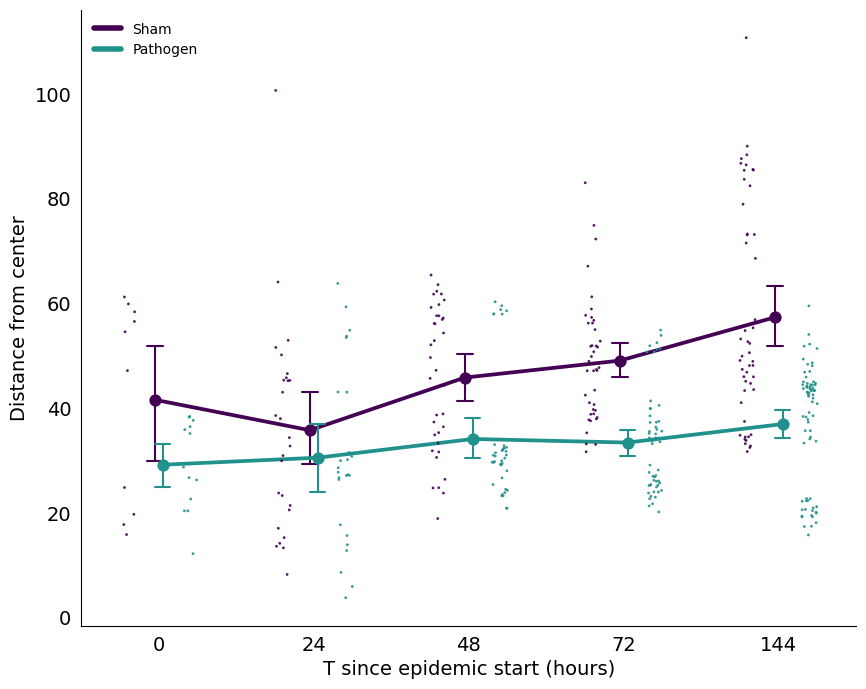

In [46]:
len(path_list2)
import seaborn as sns
box=False
strip=True
strip_col=False
mean=True
logscale=False
variable='path'
ylab='Distance from center'
#'Volume ($\mathrm{mm}^3$)'
data_to_plot=df
filename= 'white_'+variable
#
viridis_map = cm.get_cmap('viridis')
# Get a list of 10 colors from the Viridis color map
num_colors = 3
viridis_colors = viridis_map(np.linspace(0, 1, num_colors))
# Print the list of colors
#palette=list([viridis_colors[1], viridis_colors[0]])
palette=list([viridis_colors[0], viridis_colors[1]])
#palette=['cyan', 'orange']
#palette=['orange', 'cyan']
fontsize=14
alpha=0.9 #0.7 #0.1 for sim
pointsize=2

# alpha=0.05 #0.7 #0.1 for sim2
# pointsize=2

facecolor='white'
textcolor='black'

from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10,8))
sns.set_style("dark")
ax.set_facecolor(facecolor)
fig.patch.set_facecolor(facecolor)

if box:
    sns.boxplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                ax=ax, width=0.3, linewidth=1.5,order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if strip:
    sns.stripplot(x='day', y=variable, hue='treatment', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=2, alpha=alpha, order=['TUE', 'WED', 'THU', 'FRI', 'MON'], palette=palette)
if strip_col:
    sns.stripplot(x='day', y=variable, hue='colony', data=data_to_plot,
                  ax=ax, jitter=True, dodge=True, size=pointsize, alpha=alpha, order=['TUE', 'WED', 'THU', 'FRI', 'MON'])
if mean:
    sns.pointplot(x='day', y=variable, hue='treatment', data=data_to_plot,
              ax=ax, dodge=True, capsize=.1, errwidth=1.5, join=True,
              order=['TUE', 'WED', 'THU', 'FRI', 'MON'],palette=palette)

if logscale==True:
    ax.set_yscale('log')
#ax.set_xlabel('treatment')
# Set label color to white
ax.set_ylabel(ylab, color=textcolor, fontsize=fontsize)
ax.tick_params(axis='y', colors=textcolor)
ax.set_xlabel('T since epidemic start (hours)', color=textcolor, fontsize=fontsize)
ax.set_xticklabels(['0', '24', '48', '72', '144'], fontsize=fontsize) 
ax.tick_params(axis='x', colors=textcolor)
ax.tick_params(axis='y', labelsize=fontsize)
ymin, ymax=plt.ylim()
# y = [2, 4, 6, 8, 10,12,14,16,18]
# ax.yaxis.set_ticks(range(0, max(y)+1, 2))
#ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}"))
#ax.axhspan(ymin, ymax, xmin=0, xmax=0.2, hatch='/', facecolor='none', edgecolor='white')
handles, labels = ax.get_legend_handles_labels()
unique_labels = list([labels[0], labels[1]])
line_objects = []

for label in range(0,len(unique_labels)):
    line_objects.append(Line2D([0], [0], color=palette[label], lw=4, \
                               label=unique_labels[label]))

# Create the legend with the list of Line2D objects
legend = ax.legend(handles=line_objects, loc='upper left', frameon=False, facecolor=facecolor,\
                   edgecolor=textcolor)

for text in legend.get_texts():
    text.set_color(textcolor)


for text in legend.get_texts():
    text.set_color(textcolor)

ax.spines['bottom'].set_color(textcolor)
ax.spines['left'].set_color(textcolor)

sns.despine()

plt.show()


In [ ]:

G=nx.read_graphml(files[array_id])
Gs = sorted(nx.connected_components(G), key=len, reverse=True)
Gmax = G.subgraph(Gs[0])
G_list.append(Gmax)
G_list_width=[]
all_names=[]
G=nx.read_graphml(files_width[file])
Gs = sorted(nx.connected_components(G), key=len, reverse=True)
Gmax = G.subgraph(Gs[0])
G_list_width.append(Gmax)

In [ ]:
with open(file, 'rb') as f:
    inters = pickle.load(f)

filename = os.path.basename(file)
match = re.search(r'(\d+)\.pickle$', filename)

numbers = re.findall(r'\[([-?\d., ]+)\]', filename)[0]
numbers = [float(num.strip()) for num in numbers.split(', ')]
nurse_k=numbers[0]
nurse_ne_k=numbers[2]

match = re.search(r'(\d+)\.pickle$', filename)
iteration2 = int(match.group(1))
try:
    if iteration2!=iteration and direction=='positive':
        file_to_read+=1
    elif iteration2!=iteration and direction=='negative':
        file_to_read-=1

except IndexError:
    direction='negative'
    file_to_read-=1

In [ ]:
path_list4=[]
for i in path_list:
    path_list4.append(i[0])
path_list=path_list4

In [ ]:
path_list3=[]
for i in path_list2:
    path_list3.append(i[0])
path_list2=path_list3

In [ ]:
from scipy.stats import pearsonr

correlation_close_short, _ = pearsonr(path_list, closeness_list)
correlation_deg_bet, _ = pearsonr(deg_cen_list, betweenness_list)
correlation_clo_bet, _ = pearsonr(closeness_list, betweenness_list)
correlation_path_bet, _ = pearsonr(path_list, betweenness_list)
print(correlation_close_short)

In [ ]:
plot_correlation(deg_cen_list2, closeness_list2, 'degree Values', 'Closeness Values', f'Correlation modified (r = {correlation_close_short:.2f})', 221)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, linregress

def plot_correlation(x, y, xlabel, ylabel, title, subplot):
    slope, intercept, _, _, _ = linregress(x, y)
    line_of_best_fit = [slope * xi + intercept for xi in x]
    plt.subplot(subplot)
    plt.scatter(x, y, label='Data Points')
    plt.plot(x, line_of_best_fit, label='Line of Best Fit', color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

# Example lists (replace with your actual data)
# ...

# Calculate correlations
correlation_close_short, _ = pearsonr(path_list, closeness_list)
correlation_deg_bet, _ = pearsonr(deg_cen_list, betweenness_list)
correlation_clo_bet, _ = pearsonr(closeness_list, betweenness_list)
correlation_path_bet, _ = pearsonr(path_list, betweenness_list)

plt.figure(figsize=(12, 12))

# Plot correlation_close_short
plot_correlation(path_list2, closeness_list2, 'Path Values', 'Closeness Values', f'Correlation Close Short (r = {correlation_close_short:.2f})', 221)

# Plot correlation_deg_bet
plot_correlation(deg_cen_list, betweenness_list, 'Degree Centrality Values', 'Betweenness Values', f'Correlation Degree Betweenness (r = {correlation_deg_bet:.2f})', 222)

# Plot correlation_clo_bet
plot_correlation(closeness_list, betweenness_list, 'Closeness Centrality Values', 'Betweenness Values', f'Correlation Closeness Betweenness (r = {correlation_clo_bet:.2f})', 223)

# Plot correlation_path_bet
plot_correlation(path_list, betweenness_list, 'Path Values', 'Betweenness Values', f'Correlation Path Betweenness (r = {correlation_path_bet:.2f})', 224)

# Show the plots
plt.show()


This is for sham networks.

In [ ]:
   # old trying to sort path and closeness
    #FOR PATH 24 THIS GIVES MAX PATH LENGTH AND CLOSENESS
    #FAR AWAY FROM ENTRANCE BUT CLOSE TO OTHER NODES
            # Sort nodes by closeness centrality in descending order (higher is better)
    sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
    sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node], reverse=True)
    print(sorted_by_path)
    # You can now select the top nodes based on these sorted lists.
    # For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            top_closeness_nodes = sorted_by_closeness[:n]
            bottom_path_nodes = sorted_by_path[:n]
            # Find the intersection of these two sets to get nodes that meet both criteria
            optimal_nodes = list(set(top_closeness_nodes) & set(bottom_path_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
        G_HI_CLOSE_HI_PATH=G.copy()
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_HI_CLOSE_HI_PATH, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_HI_CLOSE_HI_PATH, {node: {'TYPE': 'CHAM'}})
        print(len(ALL_CHAM_NUMS), len(optimal_nodes))
        G_HI_CLOSE_HI_PATH_list.append(G_HI_CLOSE_HI_PATH)
        print("Nodes with highest closeness and longest path:", optimal_nodes)
        
    closeness_centrality_spatial2 = nx.closeness_centrality(G_HI_CLOSE_HI_PATH, distance='weight', wf_improved=True)    
    closeness_centrality_spatial_values2 = [value for key, value in closeness_centrality_spatial2.items() if key in ALL_CHAM_NUMS]
    closeness_list2.extend(closeness_centrality_spatial_values2)
    
    #THIS GIVES LOWEST CLOSENESS AND LOWEST PATH LENGTH    
    sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node])
    sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])
    # You can now select the top nodes based on these sorted lists.
    # For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            top_closeness_nodes = sorted_by_closeness[:n]
            bottom_path_nodes = sorted_by_path[:n]
            # Find the intersection of these two sets to get nodes that meet both criteria
            optimal_nodes = list(set(top_closeness_nodes) & set(bottom_path_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_LO_CLOSE_LO_PATH=G.copy()
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_LO_CLOSE_LO_PATH, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_LO_CLOSE_LO_PATH, {node: {'TYPE': 'CHAM'}})
            
        G_LO_CLOSE_LO_PATH_list.append(G_LO_CLOSE_LO_PATH)
        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
        
        
    #HIGH CLOSENESS SHORT PATH    
    sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
    sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])
    # You can now select the top nodes based on these sorted lists.
    # For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            top_closeness_nodes = sorted_by_closeness[:n]
            bottom_path_nodes = sorted_by_path[:n]
            # Find the intersection of these two sets to get nodes that meet both criteria
            optimal_nodes = list(set(top_closeness_nodes) & set(bottom_path_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()
            
        G_HI_CLOSE_LO_PATH=G.copy()
        #reassign 
        for node in ALL_CHAM_NUMS:
            nx.set_node_attributes(G_HI_CLOSE_LO_PATH, {node: {'TYPE': 'JUNC'}})
        for node in list_centrality_mod:
            nx.set_node_attributes(G_HI_CLOSE_LO_PATH, {node: {'TYPE': 'CHAM'}})
            
        G_HI_CLOSE_LO_PATH_list.append(G_HI_CLOSE_LO_PATH)
        print("Nodes with lowest closeness and shortest path:", optimal_nodes)
    else:
        G_HI_CLOSE_HI_PATH_list.append(G)
        G_HI_CLOSE_LO_PATH_list.append(G)
        G_LO_CLOSE_LO_PATH_list.append(G)


In [ ]:
        # Sort nodes by closeness centrality in descending order (higher is better)
    sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
    sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: vals3[g][node])

    # Sort nodes by betweenness centrality in ascending order (lower is better)
    sorted_by_betweenness = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node])
    sorted_by_degree = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node])

    # You can now select the top nodes based on these sorted lists.
    # For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
    num_chams=len(ALL_CHAM_NUMS)
    print(num_chams)
    n = 1  # You can change this to the desired number of nodes
    list_centrality_mod=[]
    if num_chams>0:
        while(len(list_centrality_mod)<num_chams):
            top_closeness_nodes = sorted_by_closeness[:n]
            bottom_betweenness_nodes = sorted_by_betweenness[:n]
            bottom_degree_nodes = sorted_by_degree[:n]

            # Find the intersection of these two sets to get nodes that meet both criteria
            optimal_nodes = list(set(top_closeness_nodes) & set(bottom_betweenness_nodes)\
                                &set(bottom_degree_nodes))
            optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
            list_centrality_mod=list_centrality_mod+optimal_nodes
            n+=1
        while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
            list_centrality_mod.pop()

        print("Nodes with highest closeness and lowest betweenness:", optimal_nodes)

In [ ]:
# Sort nodes by closeness centrality in descending order (higher is better)
sorted_by_closeness = sorted(ALL_JUNC_NUMS, key=lambda node: closeness_centrality_spatial[node], reverse=True)
sorted_by_path = sorted(ALL_JUNC_NUMS, key=lambda node: values_dict2[node])

# Sort nodes by betweenness centrality in ascending order (lower is better)
sorted_by_betweenness = sorted(ALL_JUNC_NUMS, key=lambda node: betweenness_centrality[node])
sorted_by_degree = sorted(ALL_JUNC_NUMS, key=lambda node: deg_cen[node])

# You can now select the top nodes based on these sorted lists.
# For example, you might want to find nodes that are in the top n for closeness and the bottom n for betweenness.
num_chams=len(ALL_CHAM_NUMS)
print(num_chams)
n = 1  # You can change this to the desired number of nodes
list_centrality_mod=[]
while(len(list_centrality_mod)<num_chams):
    bottom_closeness_nodes = sorted_by_closeness[:n]
    bottom_betweenness_nodes = sorted_by_betweenness[:n]
    bottom_degree_nodes = sorted_by_degree[:n]

    # Find the intersection of these two sets to get nodes that meet both criteria
    optimal_nodes = list(set(top_closeness_nodes) & set(bottom_betweenness_nodes)\
                        &set(bottom_degree_nodes))
    optimal_nodes=[i for i in optimal_nodes if i not in list_centrality_mod]
    list_centrality_mod=list_centrality_mod+optimal_nodes
    n+=1
while(len(list_centrality_mod)>num_chams):# Print the optimal nodes
    list_centrality_mod.pop()
    
print("Nodes with highest closeness and lowest betweenness:", optimal_nodes)


In [ ]:
list_centrality_mod